<a href="https://colab.research.google.com/github/juanluistr38/Ciencia-de-Dados/blob/master/MarmitasEmAcao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Caminho do arquivo Excel
arquivo_excel = "/content/Custos.xlsx"

# Ler a planilha 'Consolidado2' do arquivo Excel
df = pd.read_excel(arquivo_excel, sheet_name='Consolidado2')

# Definir a coluna 'Contas' como índice
df.set_index('Contas', inplace=True)

# Transpor o DataFrame para ter os meses como linha e as contas como colunas
df_transposto = df.T

# Resetar o índice para que os meses assumam na linha de baixo
df_transposto.reset_index(inplace=True)

# Renomear a coluna do índice para 'Meses'
df_transposto.rename(columns={'index': 'Meses'}, inplace=True)

# Converter a coluna 'Meses' para datetime
df_transposto['Meses'] = pd.to_datetime(df_transposto['Meses'], format='%B/%Y', errors='coerce')

# Tentativa alternativa se houver datas que não foram convertidas
if df_transposto['Meses'].isna().any():
    df_transposto['Meses'] = pd.to_datetime(df_transposto['Meses'], format='%b/%Y', errors='coerce')

# Ordenar os dados por data
df_transposto.sort_values('Meses', inplace=True)

# Filtrar os dados para cada ano
df_2021 = df_transposto[df_transposto['Meses'].dt.year == 2021]
df_2022 = df_transposto[df_transposto['Meses'].dt.year == 2022]
df_2023 = df_transposto[df_transposto['Meses'].dt.year == 2023]
df_2024 = df_transposto[df_transposto['Meses'].dt.year == 2024]

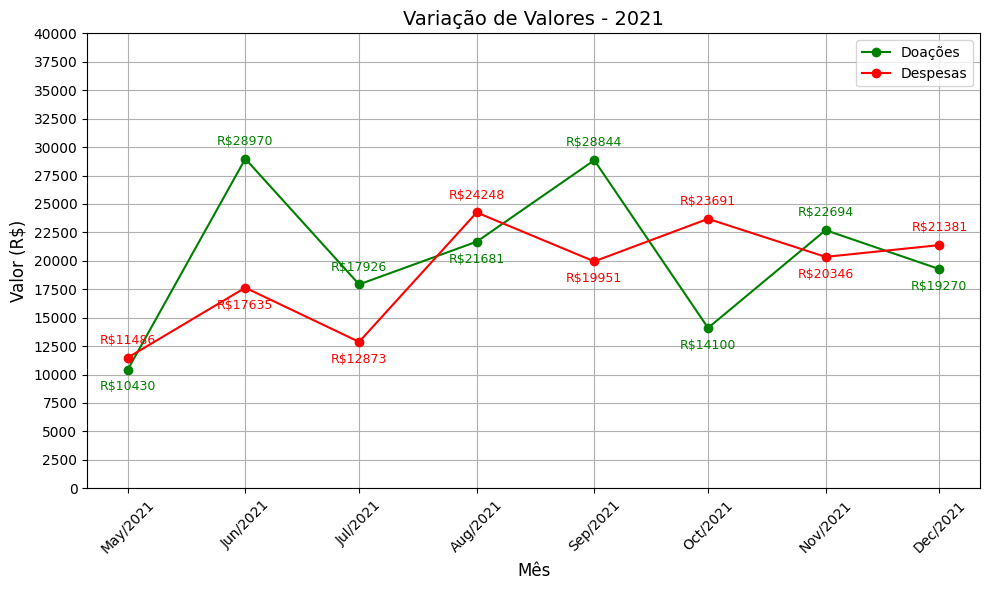

Medidas Descritivas para Doações:
            Média    Mediana  Desvio Padrão  Amplitude
Contas                                                
doações  20489.56  20475.625     6525.62203    18540.0

Medidas Descritivas para Despesas:
              Média    Mediana  Desvio Padrão  Amplitude
Contas                                                  
despesas  18951.815  20148.865    4687.058383    12762.1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Função para criar o gráfico de linha para o ano de 2021
def plot_graph_2021(df_2021):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotar doações
    ax.plot(df_2021['Meses'], df_2021['doações'], label='Doações', marker='o', color="green")
    ax.plot(df_2021['Meses'], df_2021['despesas'], label='Despesas', marker='o', color="red")

    # Adicionar rótulos, ajustando a posição com base nos valores
    for i in range(len(df_2021)):
        doacao = df_2021['doações'].iloc[i]
        despesa = df_2021['despesas'].iloc[i]

        if doacao > despesa:
            # Doação maior que despesa: rótulo de doação acima e despesa abaixo
            ax.annotate(f'R${int(doacao)}', (df_2021['Meses'].iloc[i], doacao),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='green')
            ax.annotate(f'R${int(despesa)}', (df_2021['Meses'].iloc[i], despesa),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='red')
        else:
            # Despesa maior que doação: rótulo de despesa acima e doação abaixo
            ax.annotate(f'R${int(despesa)}', (df_2021['Meses'].iloc[i], despesa),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')
            ax.annotate(f'R${int(doacao)}', (df_2021['Meses'].iloc[i], doacao),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='green')

    # Configurações do gráfico
    ax.set_title('Variação de Valores - 2021', fontsize=14)
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Valor (R$)', fontsize=12)

    # Formatação das datas no eixo X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # Rotacionar os rótulos do eixo X
    ax.tick_params(axis='x', rotation=45)

    # Definir limite no eixo Y e marcações de 2500 em 2500
    ax.set_ylim(0, 40000)
    ax.yaxis.set_major_locator(plt.MultipleLocator(2500))

    # Adicionar legenda e grade
    ax.legend(fontsize=10)
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Chamar a função para o ano de 2021
plot_graph_2021(df_2021)


# Calcular medidas descritivas para doações e despesas
medidas_doacoes = df_2021[['doações']].describe()
medidas_despesas = df_2021[['despesas']].describe()

# Calcular amplitude para doações e despesas
amplitude_doacoes = medidas_doacoes.loc['max'] - medidas_doacoes.loc['min']
amplitude_despesas = medidas_despesas.loc['max'] - medidas_despesas.loc['min']

# Criar DataFrame com medidas selecionadas em português brasileiro
medidas_doacoes_pt = pd.DataFrame({
    'Média': medidas_doacoes.loc['mean'],
    'Mediana': medidas_doacoes.loc['50%'],
    'Desvio Padrão': medidas_doacoes.loc['std'],
    'Amplitude': amplitude_doacoes
})

medidas_despesas_pt = pd.DataFrame({
    'Média': medidas_despesas.loc['mean'],
    'Mediana': medidas_despesas.loc['50%'],
    'Desvio Padrão': medidas_despesas.loc['std'],
    'Amplitude': amplitude_despesas
})

# Exibir resultados
print("Medidas Descritivas para Doações:")
print(medidas_doacoes_pt)

print("\nMedidas Descritivas para Despesas:")
print(medidas_despesas_pt)


**No primeiro ano de atuação, em 2021, tivemos 8 meses de operação entre Maio e Dezembro de 2021.**

**Em 50% dos meses, 4 meses, nos outros 4 meses tivemos as despesas superiores as doações.**

**Destaque para a amplitude das doações em 2021 que foi muito superior as despesas do mesmo ano.**


<ipython-input-30-0591c01d9f32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diferença'] = df['doações'] - df['despesas']


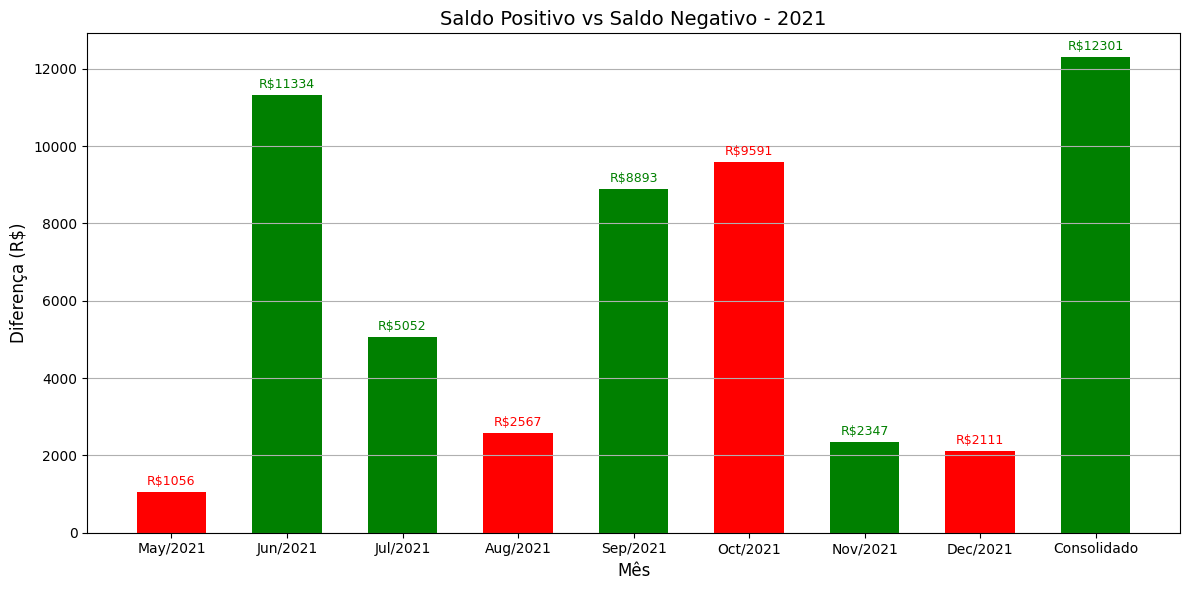

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Função para criar gráfico comparando doações e despesas mês a mês com barra consolidada anual
def plot_doacoes_vs_despesas(df, ano):

    # Calculando as diferenças mensais e o saldo anual
    df['Diferença'] = df['doações'] - df['despesas']
    saldo_anual = df['Diferença'].sum()

    # Configurando as barras
    fig, ax = plt.subplots(figsize=(12,6))
    bar_width = 0.6
    meses = np.arange(len(df['Meses']))

    # Plotando barras para cada mês
    for i in range(len(df)):
        doacao = df['doações'].iloc[i]
        despesa = df['despesas'].iloc[i]
        diferenca = doacao - despesa

        if diferenca > 0:
            # Doação maior que despesa: barra verde
            ax.bar(meses[i], diferenca, color='green', width=bar_width)
            ax.annotate(f'R${int(diferenca)}', (meses[i], diferenca),
                        textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='green')
        else:
            # Despesa maior que doação: barra vermelha
            ax.bar(meses[i], abs(diferenca), color='red', width=bar_width)
            ax.annotate(f'R${int(abs(diferenca))}', (meses[i], abs(diferenca)),
                        textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='red')

    # Adicionando a barra consolidada do saldo anual no final
    consolidado_cor = 'green' if saldo_anual > 0 else 'red'
    ax.bar(len(meses), abs(saldo_anual), color=consolidado_cor, width=bar_width)
    ax.annotate(f'R${int(abs(saldo_anual))}', (len(meses), abs(saldo_anual)),
                textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color=consolidado_cor)

    # Adicionando rótulos para cada mês e o saldo anual
    ax.set_xticks(np.append(meses, len(meses)))
    ax.set_xticklabels(list(df['Meses'].dt.strftime('%b/%Y')) + ['Consolidado'])

    # Configurações do gráfico
    ax.set_title(f'Saldo Positivo vs Saldo Negativo - {ano}', fontsize=14)
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Diferença (R$)', fontsize=12)
    ax.grid(True, axis='y')

    plt.tight_layout()
    plt.show()

# Exemplo de uso para o ano de 2021
plot_doacoes_vs_despesas(df_2021, '2021')


**Na análise do gráfico de saldo positivo vs saldo negativo, pode-se perceber mais claramente qual variável saiu vitoriosa a cada mês, sendo que no final do ano houve uma vantagem das doações, ou seja, o ano terminou superavitário. Isso foi ocasionado pelo acúmulo de reservas no mês de Junho, segundo mês de operação.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Função para formatar os meses no padrão 'mes/ano'
def formatar_meses(df):
    df['Meses Formatados'] = df['Meses'].dt.strftime('%b/%Y').str.lower()  # Formata para 'mes/ano' e deixa em minúsculas
    return df

# Função para gerar gráfico de colunas deitadas para doações
def plot_colunas_doacoes(df, ano):
    # Formatar os meses
    df = formatar_meses(df)

    # Calcular o acumulado anual para doações
    df['Acumulado Doações'] = df['doações'].cumsum()

    # Calcular a participação mensal de cada doação em relação ao acumulado do ano
    acumulado_doacoes_total = df['Acumulado Doações'].iloc[-1]  # Último valor é o total anual
    df['Participação Doações (%)'] = (df['doações'] / acumulado_doacoes_total) * 100

    # Gráfico de colunas deitadas para doações
    fig, ax = plt.subplots(figsize=(10, 6))
    y_pos = range(len(df))  # Posições no eixo Y
    ax.barh(y_pos, df['Participação Doações (%)'], color='green', height=0.9, label='Doações')

    # Configurar os rótulos do eixo Y com os meses formatados
    ax.set_yticks(y_pos)
    ax.set_yticklabels(df['Meses Formatados'])

    # Adicionar rótulos de percentual ao lado de cada coluna de doações
    for index, value in enumerate(df['Participação Doações (%)']):
        ax.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=10, color='green')

    # Configurações do gráfico de doações
    ax.set_title(f'Participação das doações de cada mês - {ano}', fontsize=16)
    ax.set_xlabel('Participação Mensal (%)', fontsize=12)
    ax.set_ylabel('Mês', fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    # Ajustar limites do eixo X para evitar que as colunas toquem na borda direita
    ax.set_xlim(0, df['Participação Doações (%)'].max() + 10)

    plt.tight_layout()
    plt.show()

# Função para gerar gráfico de colunas deitadas para despesas
def plot_colunas_despesas(df, ano):
    # Formatar os meses
    df = formatar_meses(df)

    # Calcular o acumulado anual para despesas
    df['Acumulado Despesas'] = df['despesas'].cumsum()

    # Calcular a participação mensal de cada despesa em relação ao acumulado do ano
    acumulado_despesas_total = df['Acumulado Despesas'].iloc[-1]  # Último valor é o total anual
    df['Participação Despesas (%)'] = (df['despesas'] / acumulado_despesas_total) * 100

    # Gráfico de colunas deitadas para despesas
    fig, ax = plt.subplots(figsize=(10, 6))
    y_pos = range(len(df))  # Posições no eixo Y
    ax.barh(y_pos, df['Participação Despesas (%)'], color='red', height=0.9, label='Despesas')

    # Configurar os rótulos do eixo Y com os meses formatados
    ax.set_yticks(y_pos)
    ax.set_yticklabels(df['Meses Formatados'])

    # Adicionar rótulos de percentual ao lado de cada coluna de despesas
    for index, value in enumerate(df['Participação Despesas (%)']):
        ax.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=10, color='red')

    # Configurações do gráfico de despesas
    ax.set_title(f'Participação das despesas de cada mês  - {ano}', fontsize=16)
    ax.set_xlabel('Participação Mensal (%)', fontsize=12)
    ax.set_ylabel('Mês', fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    # Ajustar limites do eixo X para evitar que as colunas toquem na borda direita
    ax.set_xlim(0, df['Participação Despesas (%)'].max() + 10)

    plt.tight_layout()
    plt.show()


<ipython-input-31-fa0905ffa100>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Meses Formatados'] = df['Meses'].dt.strftime('%b/%Y').str.lower()  # Formata para 'mes/ano' e deixa em minúsculas
<ipython-input-31-fa0905ffa100>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acumulado Doações'] = df['doações'].cumsum()
<ipython-input-31-fa0905ffa100>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

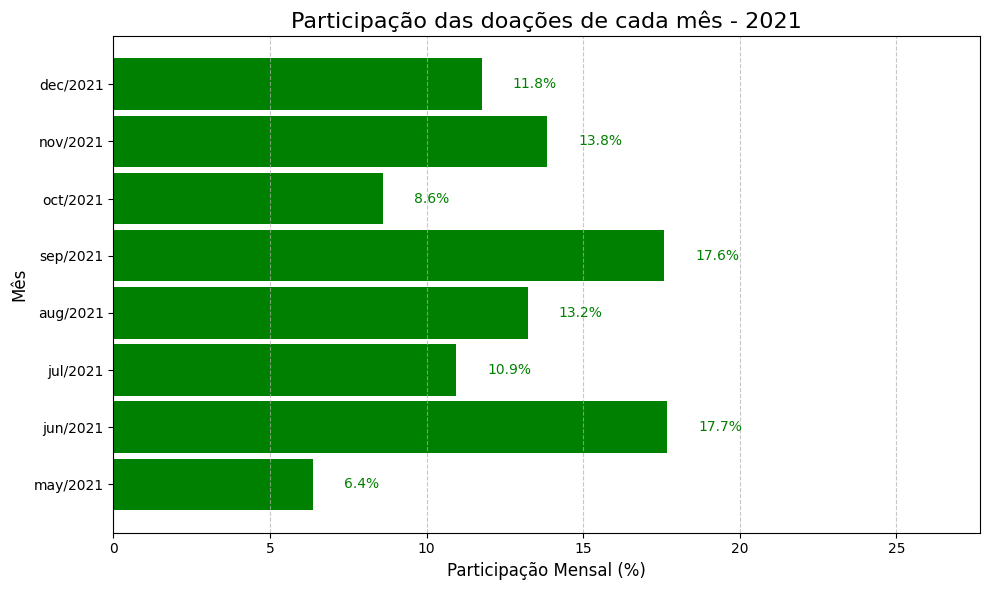

In [ ]:
plot_colunas_doacoes(df_2021, '2021')

**Logo acima, comparação entre os meses do mesmo ano, para entender quais os meses mais favoráveis para arrecadação nesse ano.**

<ipython-input-31-fa0905ffa100>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Meses Formatados'] = df['Meses'].dt.strftime('%b/%Y').str.lower()  # Formata para 'mes/ano' e deixa em minúsculas
<ipython-input-31-fa0905ffa100>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acumulado Despesas'] = df['despesas'].cumsum()
<ipython-input-31-fa0905ffa100>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

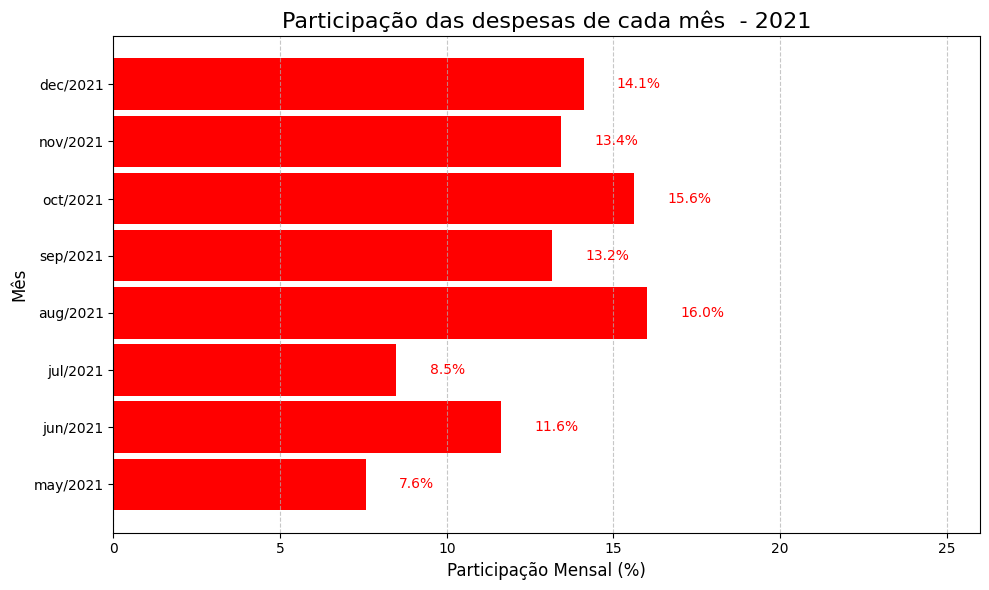

In [ ]:
plot_colunas_despesas(df_2021, "2021")

**Logo acima, comparação entre os meses do mesmo ano, para entender quais os meses que geraram mais gastos no ano.**


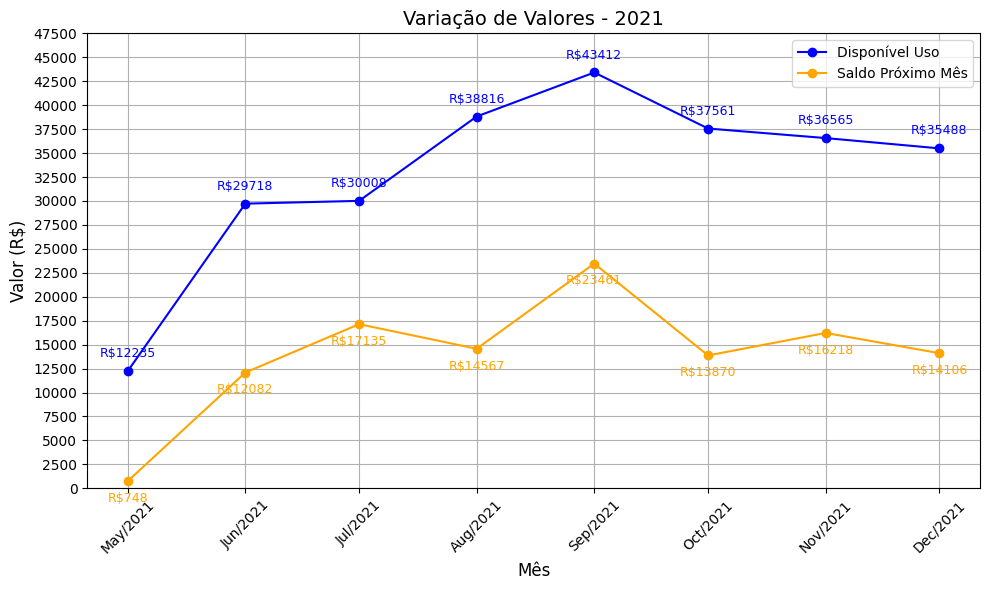

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Função para criar o gráfico de linha para o ano de 2021
def plot_graph_2021(df_2021):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotar disponível uso
    ax.plot(df_2021['Meses'], df_2021['disponivel uso'], label='Disponível Uso', marker='o', color="blue")
    ax.plot(df_2021['Meses'], df_2021['saldo prox mês'], label='Saldo Próximo Mês', marker='o', color="orange")

    # Adicionar rótulos, ajustando a posição com base nos valores
    for i in range(len(df_2021)):
        disponivel = df_2021['disponivel uso'].iloc[i]
        saldo = df_2021['saldo prox mês'].iloc[i]

        if disponivel > saldo:
            # Disponível maior que saldo: rótulo de disponível acima e saldo abaixo
            ax.annotate(f'R${int(disponivel)}', (df_2021['Meses'].iloc[i], disponivel),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')
            ax.annotate(f'R${int(saldo)}', (df_2021['Meses'].iloc[i], saldo),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='orange')
        else:
            # Saldo maior que disponível: rótulo de saldo acima e disponível abaixo
            ax.annotate(f'R${int(saldo)}', (df_2021['Meses'].iloc[i], saldo),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='orange')
            ax.annotate(f'R${int(disponivel)}', (df_2021['Meses'].iloc[i], disponivel),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='blue')

    # Configurações do gráfico
    ax.set_title('Variação de Valores - 2021', fontsize=14)
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Valor (R$)', fontsize=12)

    # Formatação das datas no eixo X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # Rotacionar os rótulos do eixo X
    ax.tick_params(axis='x', rotation=45)

    # Definir limite no eixo Y e marcações de 2500 em 2500
    ax.set_ylim(0, 47500)
    ax.yaxis.set_major_locator(plt.MultipleLocator(2500))

    # Adicionar legenda e grade
    ax.legend(fontsize=10)
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Chamar a função para o ano de 2021
plot_graph_2021(df_2021)


**O desenho dos gráficos acima diz muita coisa. É bastante notório que o dinheiro disponível para uso possui a mesma trajetória do saldo residual mês a mês. Ou seja, neste ano o saldo disponível dependia bastante do saldo residual, o que, definitivamente, não é bom,pois mantendo-se esse movimento, a tendência é do consumo total do saldo residual e da falta de disponível para uso e continuidade dos projetos.**

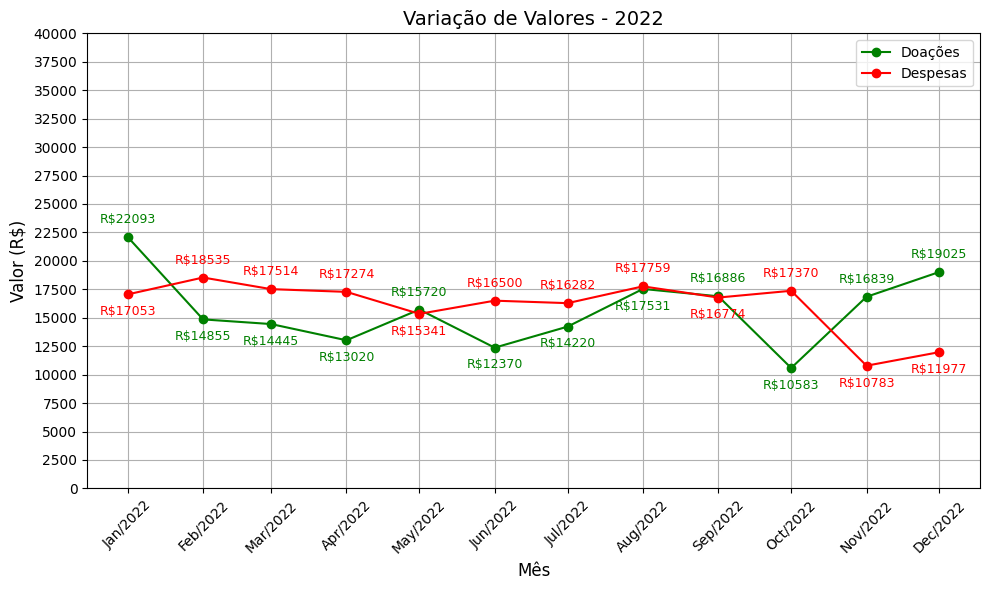

Medidas Descritivas para Doações:
                Média   Mediana  Desvio Padrão  Amplitude
Contas                                                   
doações  15632.384167  15287.71     3116.94379   11510.33

Medidas Descritivas para Despesas:
                 Média   Mediana  Desvio Padrão  Amplitude
Contas                                                    
despesas  16097.340833  16914.09    2356.138402    7751.81


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Função para criar o gráfico de linha para o ano de 2022
def plot_graph_2022(df_2022):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotar doações
    ax.plot(df_2022['Meses'], df_2022['doações'], label='Doações', marker='o', color="green")
    ax.plot(df_2022['Meses'], df_2022['despesas'], label='Despesas', marker='o', color="red")

    # Adicionar rótulos, ajustando a posição com base nos valores
    for i in range(len(df_2022)):
        doacao = df_2022['doações'].iloc[i]
        despesa = df_2022['despesas'].iloc[i]

        if doacao > despesa:
            # Doação maior que despesa: rótulo de doação acima e despesa abaixo
            ax.annotate(f'R${int(doacao)}', (df_2022['Meses'].iloc[i], doacao),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='green')
            ax.annotate(f'R${int(despesa)}', (df_2022['Meses'].iloc[i], despesa),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='red')
        else:
            # Despesa maior que doação: rótulo de despesa acima e doação abaixo
            ax.annotate(f'R${int(despesa)}', (df_2022['Meses'].iloc[i], despesa),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')
            ax.annotate(f'R${int(doacao)}', (df_2022['Meses'].iloc[i], doacao),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='green')

    # Configurações do gráfico
    ax.set_title('Variação de Valores - 2022', fontsize=14)
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Valor (R$)', fontsize=12)

    # Formatação das datas no eixo X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # Rotacionar os rótulos do eixo X
    ax.tick_params(axis='x', rotation=45)

    # Definir limite no eixo Y e marcações de 2500 em 2500
    ax.set_ylim(0, 40000)
    ax.yaxis.set_major_locator(plt.MultipleLocator(2500))

    # Adicionar legenda e grade
    ax.legend(fontsize=10)
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Chamar a função para o ano de 2022
plot_graph_2022(df_2022)


# Calcular medidas descritivas para doações e despesas
medidas_doacoes = df_2022[['doações']].describe()
medidas_despesas = df_2022[['despesas']].describe()

# Calcular amplitude para doações e despesas
amplitude_doacoes = medidas_doacoes.loc['max'] - medidas_doacoes.loc['min']
amplitude_despesas = medidas_despesas.loc['max'] - medidas_despesas.loc['min']

# Criar DataFrame com medidas selecionadas em português brasileiro
medidas_doacoes_pt = pd.DataFrame({
    'Média': medidas_doacoes.loc['mean'],
    'Mediana': medidas_doacoes.loc['50%'],
    'Desvio Padrão': medidas_doacoes.loc['std'],
    'Amplitude': amplitude_doacoes
})

medidas_despesas_pt = pd.DataFrame({
    'Média': medidas_despesas.loc['mean'],
    'Mediana': medidas_despesas.loc['50%'],
    'Desvio Padrão': medidas_despesas.loc['std'],
    'Amplitude': amplitude_despesas
})

# Exibir resultados
print("Medidas Descritivas para Doações:")
print(medidas_doacoes_pt)

print("\nMedidas Descritivas para Despesas:")
print(medidas_despesas_pt)


**Em 2022, tivemos 12 meses de operação entre Janeiro e Dezembro de 2022.**

**Em 67% dos meses, 8 meses,tivemos vitória das despesas sobre as doações.**

**No mês de Outubro de 2022, tivemos uma gasto com despesas muito superior às doações,o que ocasionou prejuízo acumulado no consolidado do ano de 2022 e impactou o saldo disponível para uso para o próximo mês, assim como ocasionou dimunição considerável do saldo residual**



<ipython-input-30-0591c01d9f32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diferença'] = df['doações'] - df['despesas']


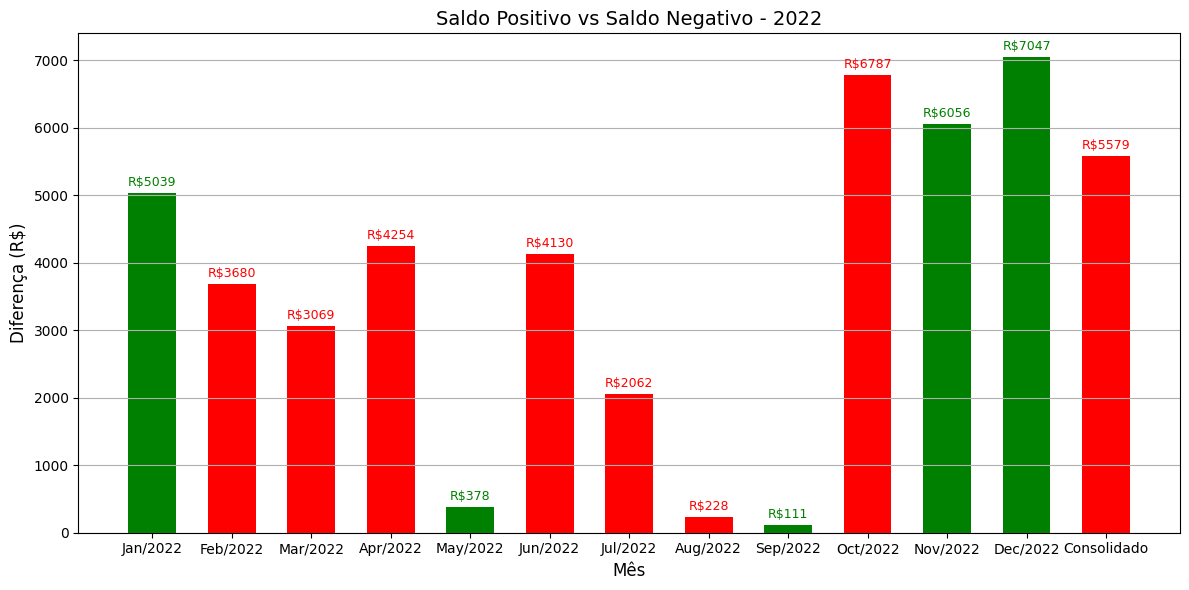

In [ ]:
# Exemplo de uso para o ano de 2022
plot_doacoes_vs_despesas(df_2022, '2022')


<ipython-input-31-fa0905ffa100>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Meses Formatados'] = df['Meses'].dt.strftime('%b/%Y').str.lower()  # Formata para 'mes/ano' e deixa em minúsculas
<ipython-input-31-fa0905ffa100>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acumulado Doações'] = df['doações'].cumsum()
<ipython-input-31-fa0905ffa100>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

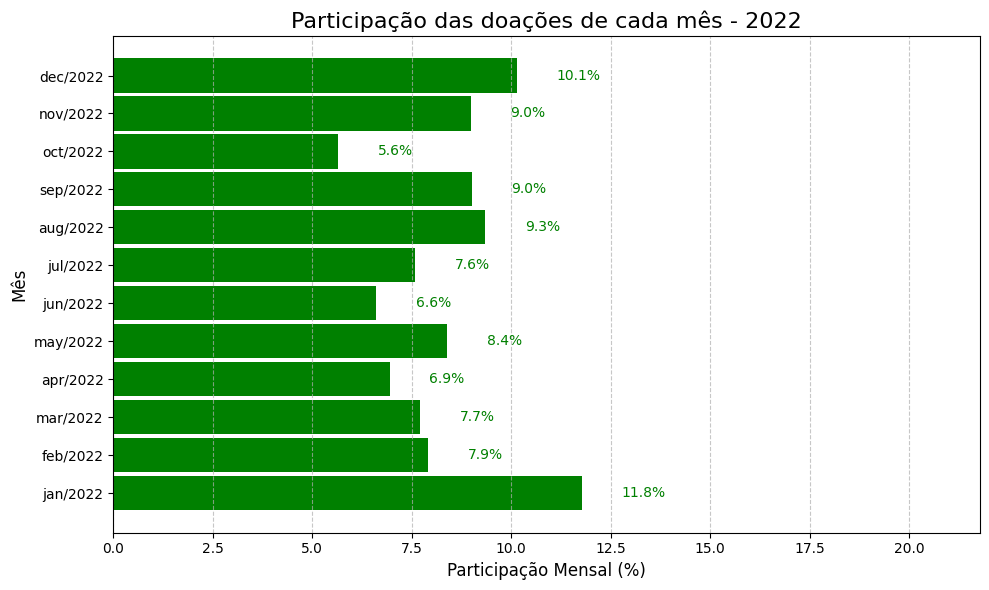

In [ ]:
plot_colunas_doacoes(df_2022, '2022')

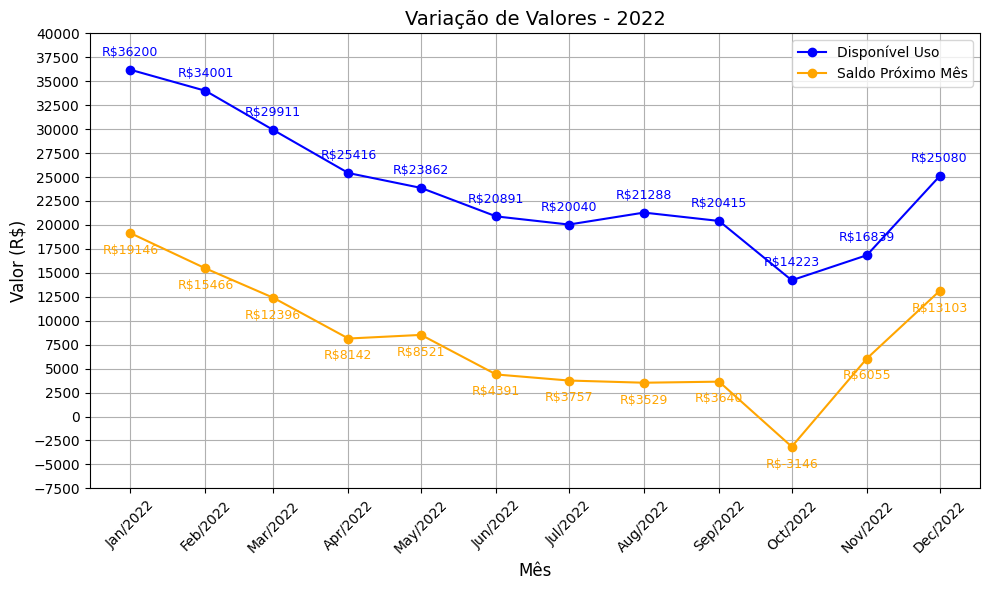

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Função para criar o gráfico de linha para o ano de 2022
def plot_graph_2022(df_2022):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotar disponível uso
    ax.plot(df_2022['Meses'], df_2022['disponivel uso'], label='Disponível Uso', marker='o', color="blue")
    ax.plot(df_2022['Meses'], df_2022['saldo prox mês'], label='Saldo Próximo Mês', marker='o', color="orange")

    # Adicionar rótulos, ajustando a posição com base nos valores
    for i in range(len(df_2022)):
        disponivel = df_2022['disponivel uso'].iloc[i]
        saldo = df_2022['saldo prox mês'].iloc[i]

        if disponivel > saldo:
            # Disponível maior que saldo: rótulo de disponível acima e saldo abaixo
            ax.annotate(f'R${int(disponivel)}', (df_2022['Meses'].iloc[i], disponivel),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')
            ax.annotate(f'R${int(saldo)}', (df_2022['Meses'].iloc[i], saldo),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='orange')
        else:
            # Saldo maior que disponível: rótulo de saldo acima e disponível abaixo
            ax.annotate(f'R${int(saldo)}', (df_2022['Meses'].iloc[i], saldo),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='orange')
            ax.annotate(f'R${int(disponivel)}', (df_2022['Meses'].iloc[i], disponivel),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='blue')

    # Configurações do gráfico
    ax.set_title('Variação de Valores - 2022', fontsize=14)
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Valor (R$)', fontsize=12)

    # Formatação das datas no eixo X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # Rotacionar os rótulos do eixo X
    ax.tick_params(axis='x', rotation=45)

    # Definir limite no eixo Y e marcações de 2500 em 2500
    ax.set_ylim(-7500, 40000)
    ax.yaxis.set_major_locator(plt.MultipleLocator(2500))

    # Adicionar legenda e grade
    ax.legend(fontsize=10)
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Chamar a função para o ano de 2022
plot_graph_2022(df_2022)


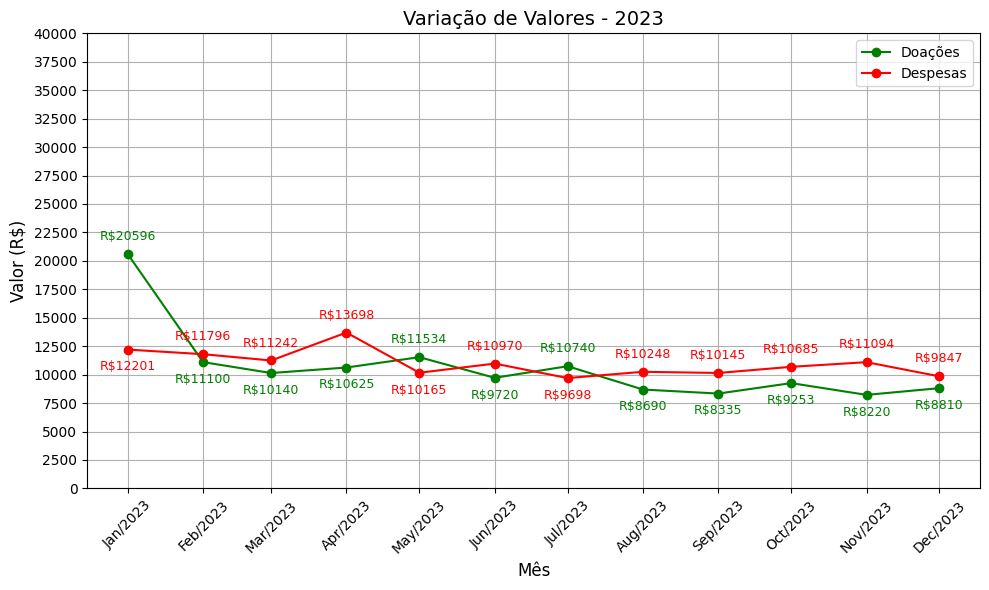

Medidas Descritivas para Doações:
                Média  Mediana  Desvio Padrão  Amplitude
Contas                                                  
doações  10646.959167   9930.0    3323.224001    12376.0

Medidas Descritivas para Despesas:
             Média    Mediana  Desvio Padrão  Amplitude
Contas                                                 
despesas  10982.81  10827.885      1149.5513    3999.86


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Função para criar o gráfico de linha para o ano de 2023
def plot_graph_2023(df_2023):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotar doações
    ax.plot(df_2023['Meses'], df_2023['doações'], label='Doações', marker='o', color="green")
    ax.plot(df_2023['Meses'], df_2023['despesas'], label='Despesas', marker='o', color="red")

    # Adicionar rótulos, ajustando a posição com base nos valores
    for i in range(len(df_2023)):
        doacao = df_2023['doações'].iloc[i]
        despesa = df_2023['despesas'].iloc[i]

        if doacao > despesa:
            # Doação maior que despesa: rótulo de doação acima e despesa abaixo
            ax.annotate(f'R${int(doacao)}', (df_2023['Meses'].iloc[i], doacao),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='green')
            ax.annotate(f'R${int(despesa)}', (df_2023['Meses'].iloc[i], despesa),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='red')
        else:
            # Despesa maior que doação: rótulo de despesa acima e doação abaixo
            ax.annotate(f'R${int(despesa)}', (df_2023['Meses'].iloc[i], despesa),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')
            ax.annotate(f'R${int(doacao)}', (df_2023['Meses'].iloc[i], doacao),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='green')

    # Configurações do gráfico
    ax.set_title('Variação de Valores - 2023', fontsize=14)
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Valor (R$)', fontsize=12)

    # Formatação das datas no eixo X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # Rotacionar os rótulos do eixo X
    ax.tick_params(axis='x', rotation=45)

    # Definir limite no eixo Y e marcações de 2500 em 2500
    ax.set_ylim(0, 40000)
    ax.yaxis.set_major_locator(plt.MultipleLocator(2500))

    # Adicionar legenda e grade
    ax.legend(fontsize=10)
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Chamar a função para o ano de 2023
plot_graph_2023(df_2023)


# Calcular medidas descritivas para doações e despesas
medidas_doacoes = df_2023[['doações']].describe()
medidas_despesas = df_2023[['despesas']].describe()

# Calcular amplitude para doações e despesas
amplitude_doacoes = medidas_doacoes.loc['max'] - medidas_doacoes.loc['min']
amplitude_despesas = medidas_despesas.loc['max'] - medidas_despesas.loc['min']

# Criar DataFrame com medidas selecionadas em português brasileiro
medidas_doacoes_pt = pd.DataFrame({
    'Média': medidas_doacoes.loc['mean'],
    'Mediana': medidas_doacoes.loc['50%'],
    'Desvio Padrão': medidas_doacoes.loc['std'],
    'Amplitude': amplitude_doacoes
})

medidas_despesas_pt = pd.DataFrame({
    'Média': medidas_despesas.loc['mean'],
    'Mediana': medidas_despesas.loc['50%'],
    'Desvio Padrão': medidas_despesas.loc['std'],
    'Amplitude': amplitude_despesas
})

# Exibir resultados
print("Medidas Descritivas para Doações:")
print(medidas_doacoes_pt)

print("\nMedidas Descritivas para Despesas:")
print(medidas_despesas_pt)

<ipython-input-30-0591c01d9f32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diferença'] = df['doações'] - df['despesas']


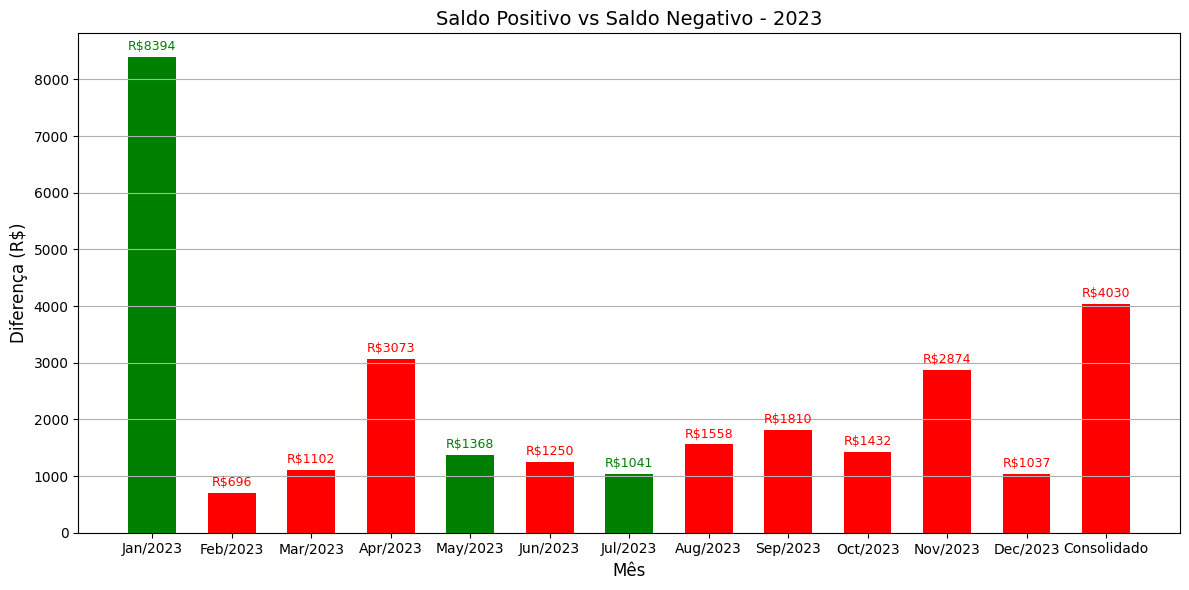

In [ ]:
# Exemplo de uso para o ano de 2021
plot_doacoes_vs_despesas(df_2023, '2023')


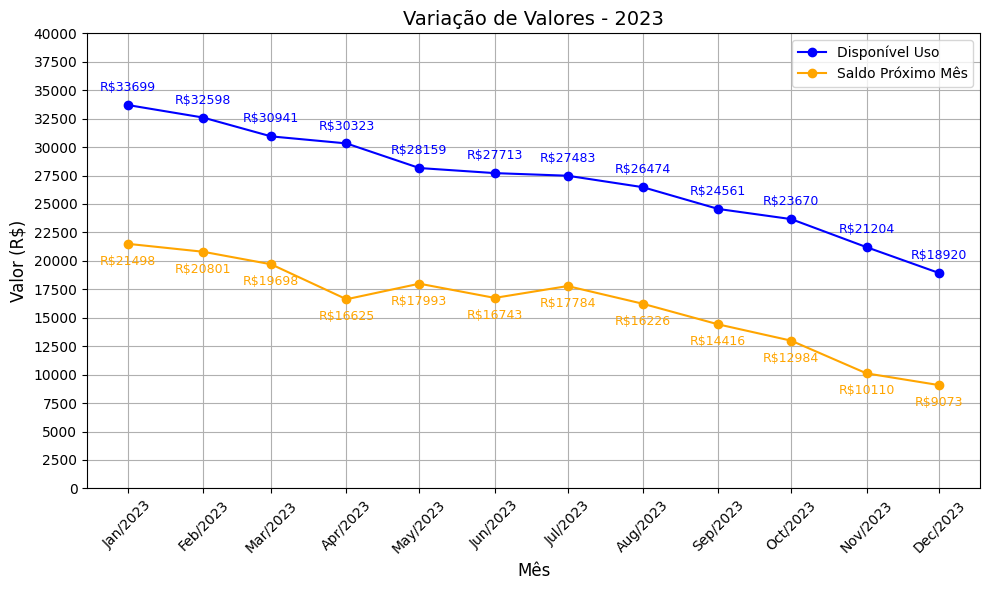

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Função para criar o gráfico de linha para o ano de 2023
def plot_graph_2023(df_2023):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotar disponível uso
    ax.plot(df_2023['Meses'], df_2023['disponivel uso'], label='Disponível Uso', marker='o', color="blue")
    ax.plot(df_2023['Meses'], df_2023['saldo prox mês'], label='Saldo Próximo Mês', marker='o', color="orange")

    # Adicionar rótulos, ajustando a posição com base nos valores
    for i in range(len(df_2023)):
        disponivel = df_2023['disponivel uso'].iloc[i]
        saldo = df_2023['saldo prox mês'].iloc[i]

        if disponivel > saldo:
            # Disponível maior que saldo: rótulo de disponível acima e saldo abaixo
            ax.annotate(f'R${int(disponivel)}', (df_2023['Meses'].iloc[i], disponivel),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')
            ax.annotate(f'R${int(saldo)}', (df_2023['Meses'].iloc[i], saldo),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='orange')
        else:
            # Saldo maior que disponível: rótulo de saldo acima e disponível abaixo
            ax.annotate(f'R${int(saldo)}', (df_2023['Meses'].iloc[i], saldo),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='orange')
            ax.annotate(f'R${int(disponivel)}', (df_2023['Meses'].iloc[i], disponivel),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='blue')

    # Configurações do gráfico
    ax.set_title('Variação de Valores - 2023', fontsize=14)
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Valor (R$)', fontsize=12)

    # Formatação das datas no eixo X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # Rotacionar os rótulos do eixo X
    ax.tick_params(axis='x', rotation=45)

    # Definir limite no eixo Y e marcações de 2500 em 2500
    ax.set_ylim(0, 40000)
    ax.yaxis.set_major_locator(plt.MultipleLocator(2500))

    # Adicionar legenda e grade
    ax.legend(fontsize=10)
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Chamar a função para o ano de 2023
plot_graph_2023(df_2023)





<ipython-input-31-fa0905ffa100>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Meses Formatados'] = df['Meses'].dt.strftime('%b/%Y').str.lower()  # Formata para 'mes/ano' e deixa em minúsculas
<ipython-input-31-fa0905ffa100>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acumulado Doações'] = df['doações'].cumsum()
<ipython-input-31-fa0905ffa100>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

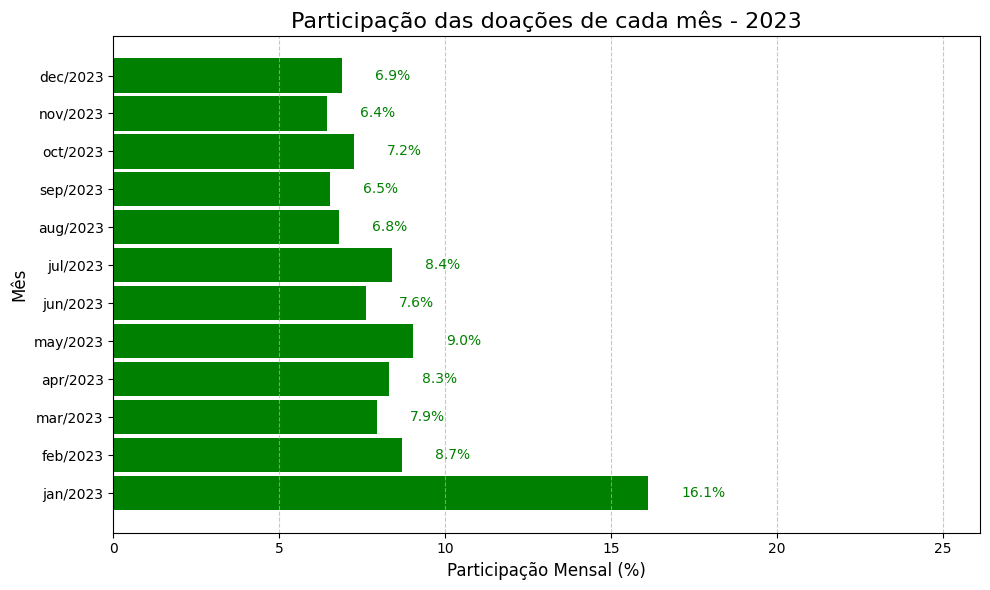

In [ ]:
plot_colunas_doacoes(df_2023, '2023')

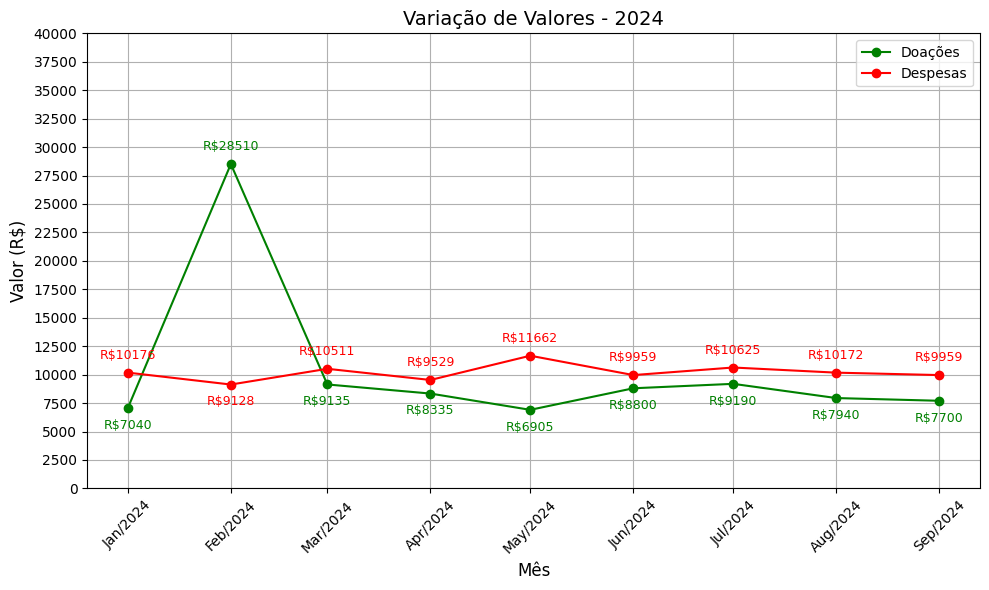

Medidas Descritivas para Doações:
           Média  Mediana  Desvio Padrão  Amplitude
Contas                                             
doações  10395.0   8335.0    6843.853538    21605.0

Medidas Descritivas para Despesas:
                 Média  Mediana  Desvio Padrão  Amplitude
Contas                                                   
despesas  10191.802222  10172.9      718.35491    2533.43


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Função para criar o gráfico de linha para o ano de 2024
def plot_graph_2024(df_2024):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotar doações
    ax.plot(df_2024['Meses'], df_2024['doações'], label='Doações', marker='o', color="green")
    ax.plot(df_2024['Meses'], df_2024['despesas'], label='Despesas', marker='o', color="red")

    # Adicionar rótulos, ajustando a posição com base nos valores
    for i in range(len(df_2024)):
        doacao = df_2024['doações'].iloc[i]
        despesa = df_2024['despesas'].iloc[i]

        if doacao > despesa:
            # Doação maior que despesa: rótulo de doação acima e despesa abaixo
            ax.annotate(f'R${int(doacao)}', (df_2024['Meses'].iloc[i], doacao),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='green')
            ax.annotate(f'R${int(despesa)}', (df_2024['Meses'].iloc[i], despesa),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='red')
        else:
            # Despesa maior que doação: rótulo de despesa acima e doação abaixo
            ax.annotate(f'R${int(despesa)}', (df_2024['Meses'].iloc[i], despesa),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')
            ax.annotate(f'R${int(doacao)}', (df_2024['Meses'].iloc[i], doacao),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='green')

    # Configurações do gráfico
    ax.set_title('Variação de Valores - 2024', fontsize=14)
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Valor (R$)', fontsize=12)

    # Formatação das datas no eixo X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # Rotacionar os rótulos do eixo X
    ax.tick_params(axis='x', rotation=45)

    # Definir limite no eixo Y e marcações de 2500 em 2500
    ax.set_ylim(0, 40000)
    ax.yaxis.set_major_locator(plt.MultipleLocator(2500))

    # Adicionar legenda e grade
    ax.legend(fontsize=10)
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Chamar a função para o ano de 2024
plot_graph_2024(df_2024)

# Calcular medidas descritivas para doações e despesas
medidas_doacoes = df_2024[['doações']].describe()
medidas_despesas = df_2024[['despesas']].describe()

# Calcular amplitude para doações e despesas
amplitude_doacoes = medidas_doacoes.loc['max'] - medidas_doacoes.loc['min']
amplitude_despesas = medidas_despesas.loc['max'] - medidas_despesas.loc['min']

# Criar DataFrame com medidas selecionadas em português brasileiro
medidas_doacoes_pt = pd.DataFrame({
    'Média': medidas_doacoes.loc['mean'],
    'Mediana': medidas_doacoes.loc['50%'],
    'Desvio Padrão': medidas_doacoes.loc['std'],
    'Amplitude': amplitude_doacoes
})

medidas_despesas_pt = pd.DataFrame({
    'Média': medidas_despesas.loc['mean'],
    'Mediana': medidas_despesas.loc['50%'],
    'Desvio Padrão': medidas_despesas.loc['std'],
    'Amplitude': amplitude_despesas
})

# Exibir resultados
print("Medidas Descritivas para Doações:")
print(medidas_doacoes_pt)

print("\nMedidas Descritivas para Despesas:")
print(medidas_despesas_pt)


**Até o presente momento, analisando a comparação entre doações e despesas em 2024, verificamos que:**

**Apenas em 1 mês de 2024, em Fevereiro, as doações foram maiores que as despesa. Em todos os outros 8 meses, as despesas foram superiores as doações, isto acarretará em um saldo residual para o próximo mês disponível que amortizará a diferença superior das despesas para os próximos meses de 2024, a comparação entre o saldo residual e o disponível em caixa pode ser verificado no gráfico abaixo.**


<ipython-input-30-0591c01d9f32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diferença'] = df['doações'] - df['despesas']


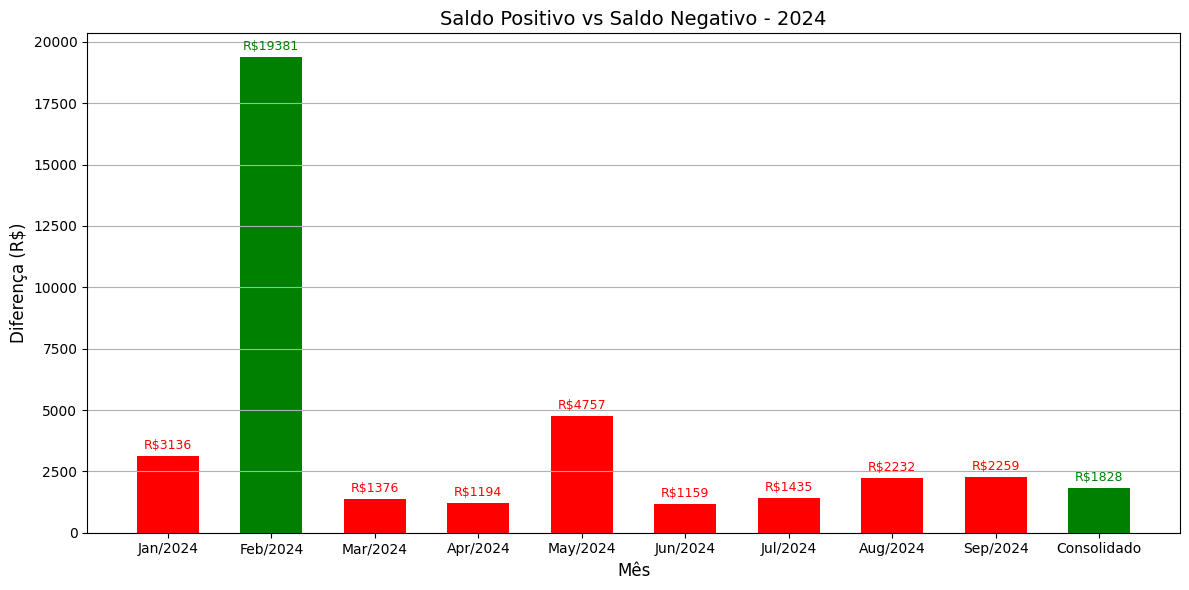

In [ ]:
# Exemplo de uso para o ano de 2024
plot_doacoes_vs_despesas(df_2024, '2024')


<ipython-input-31-fa0905ffa100>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Meses Formatados'] = df['Meses'].dt.strftime('%b/%Y').str.lower()  # Formata para 'mes/ano' e deixa em minúsculas
<ipython-input-31-fa0905ffa100>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acumulado Doações'] = df['doações'].cumsum()
<ipython-input-31-fa0905ffa100>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

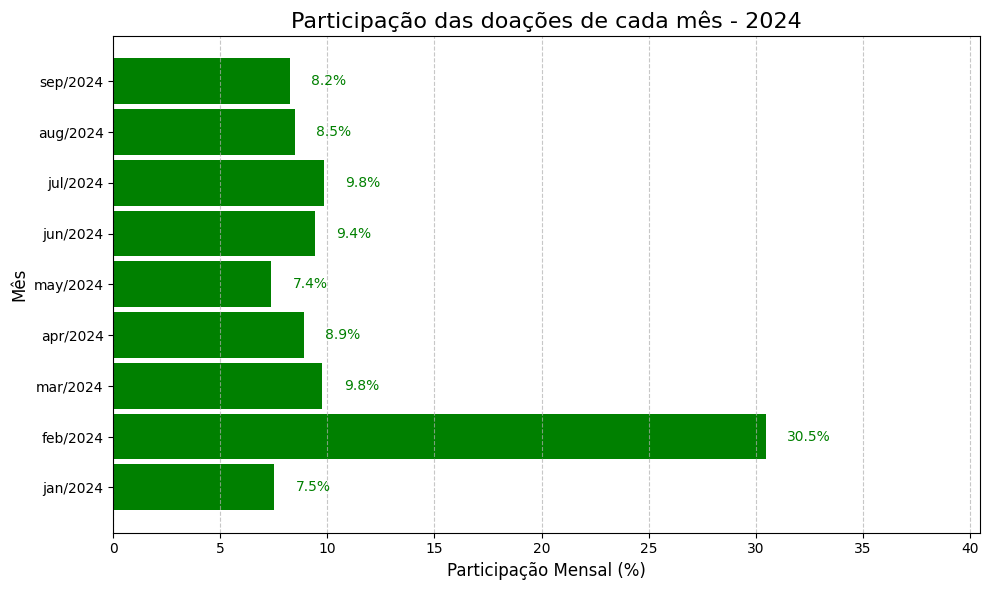

In [ ]:
plot_colunas_doacoes(df_2024, '2024')

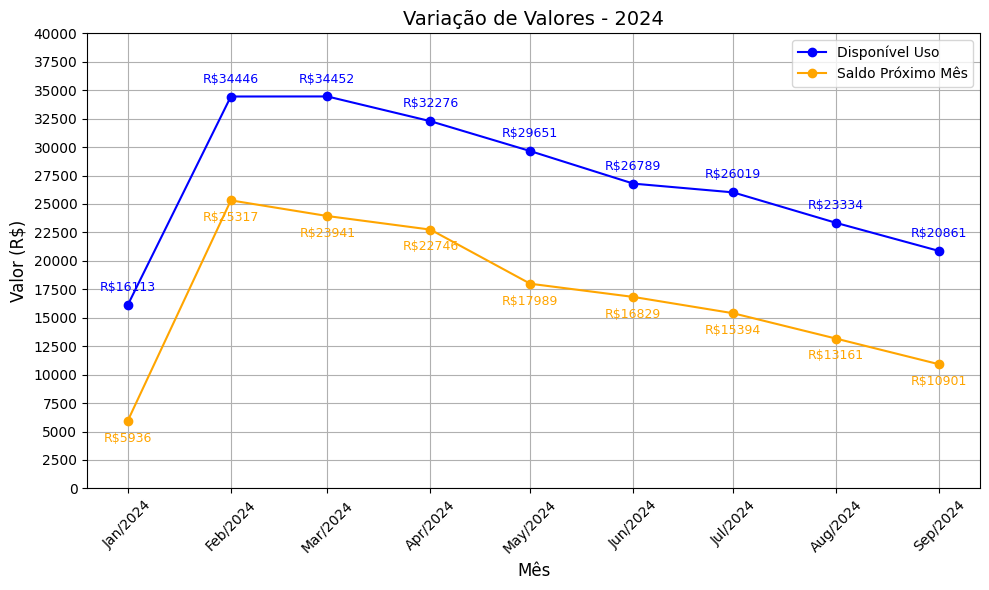

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Função para criar o gráfico de linha para o ano de 2024
def plot_graph_2024(df_2024):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotar disponível uso
    ax.plot(df_2024['Meses'], df_2024['disponivel uso'], label='Disponível Uso', marker='o', color="blue")
    ax.plot(df_2024['Meses'], df_2024['saldo prox mês'], label='Saldo Próximo Mês', marker='o', color="orange")

    # Adicionar rótulos, ajustando a posição com base nos valores
    for i in range(len(df_2024)):
        disponivel = df_2024['disponivel uso'].iloc[i]
        saldo = df_2024['saldo prox mês'].iloc[i]

        if disponivel > saldo:
            # Disponível maior que saldo: rótulo de disponível acima e saldo abaixo
            ax.annotate(f'R${int(disponivel)}', (df_2024['Meses'].iloc[i], disponivel),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')
            ax.annotate(f'R${int(saldo)}', (df_2024['Meses'].iloc[i], saldo),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='orange')
        else:
            # Saldo maior que disponível: rótulo de saldo acima e disponível abaixo
            ax.annotate(f'R${int(saldo)}', (df_2024['Meses'].iloc[i], saldo),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='orange')
            ax.annotate(f'R${int(disponivel)}', (df_2024['Meses'].iloc[i], disponivel),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='blue')

    # Configurações do gráfico
    ax.set_title('Variação de Valores - 2024', fontsize=14)
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Valor (R$)', fontsize=12)

    # Formatação das datas no eixo X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # Rotacionar os rótulos do eixo X
    ax.tick_params(axis='x', rotation=45)

    # Definir limite no eixo Y e marcações de 2500 em 2500
    ax.set_ylim(0, 40000)
    ax.yaxis.set_major_locator(plt.MultipleLocator(2500))

    # Adicionar legenda e grade
    ax.legend(fontsize=10)
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Chamar a função para o ano de 2024
plot_graph_2024(df_2024)


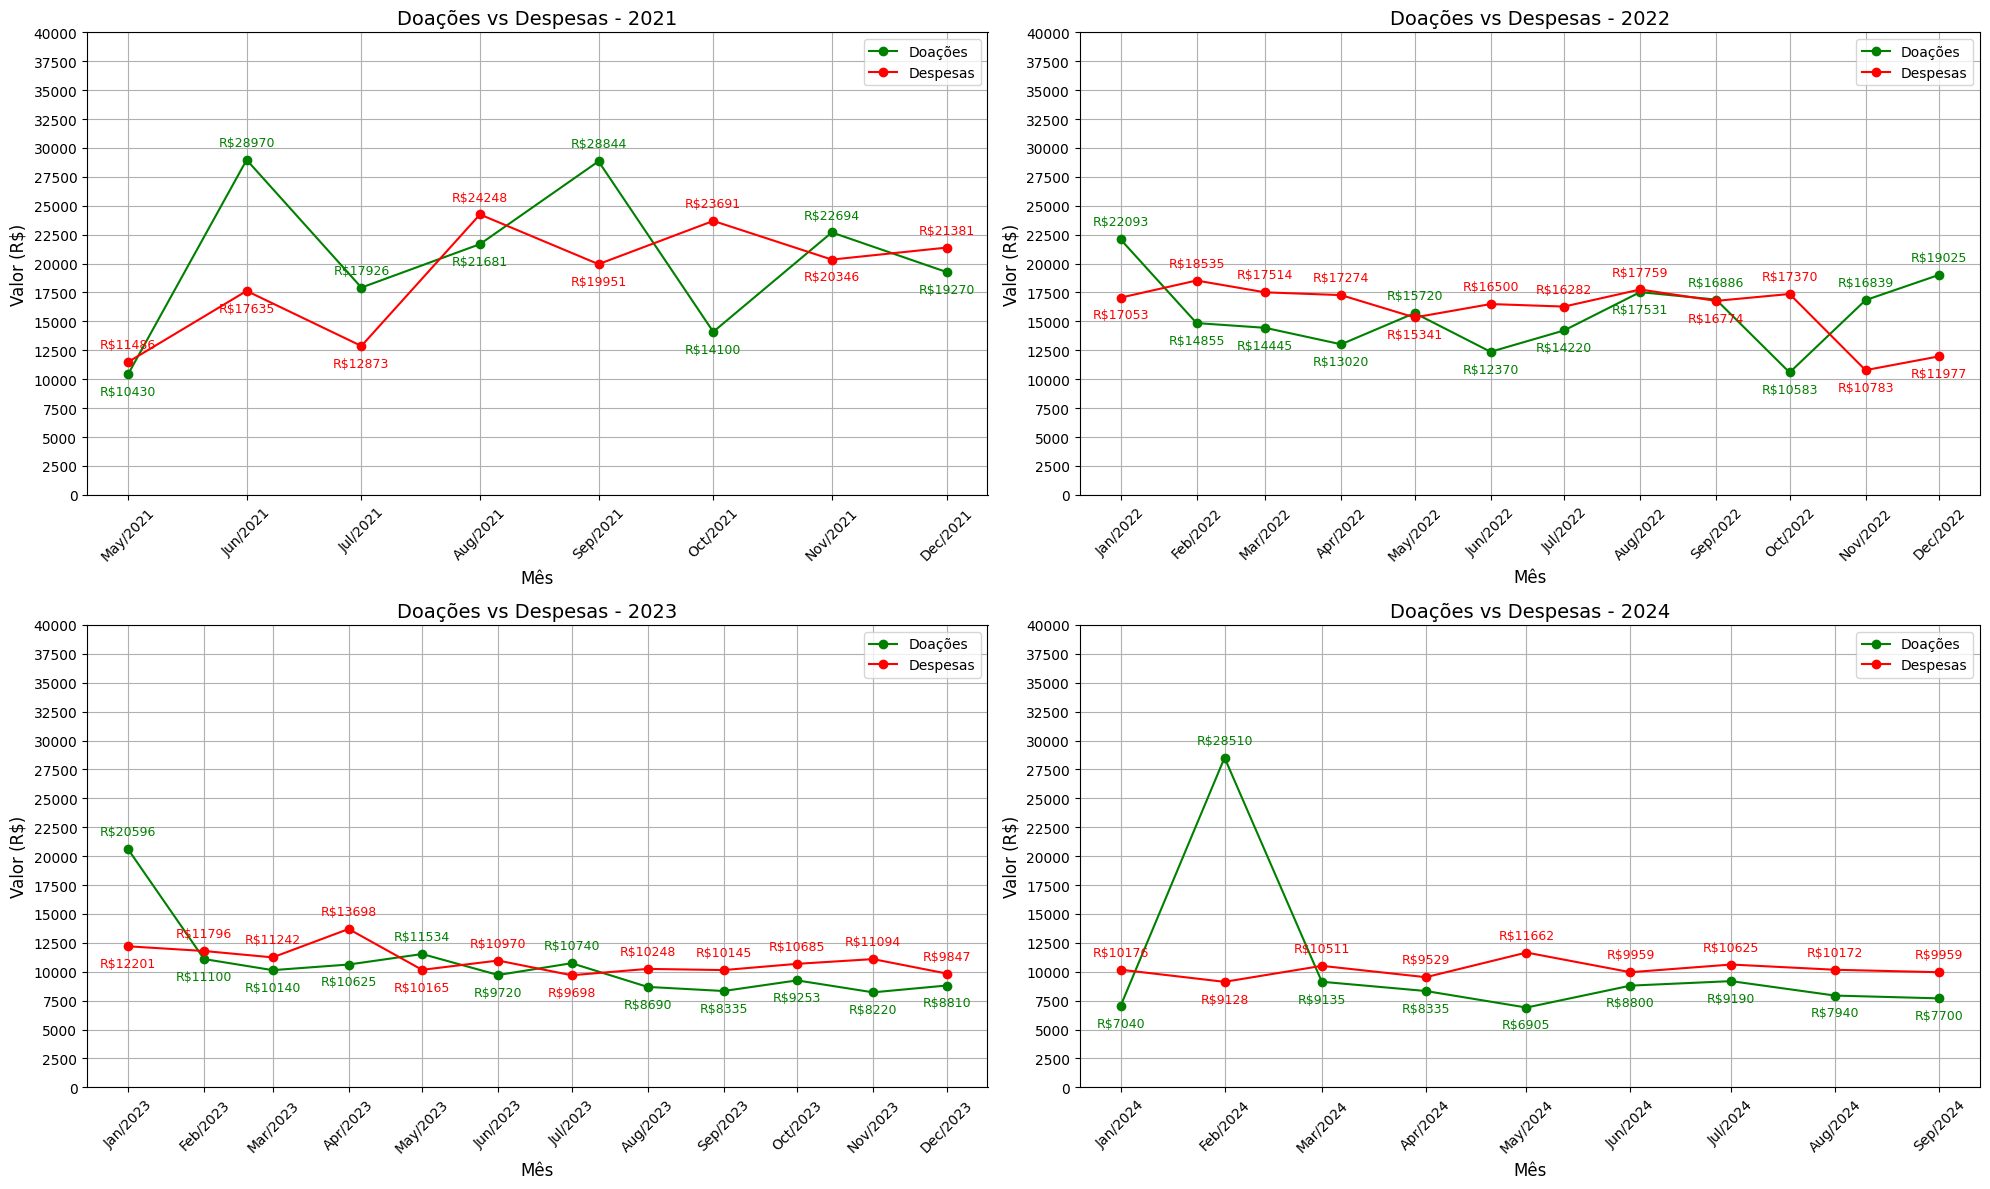

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Função para criar cada gráfico de doações vs despesas para um ano específico
def plot_graph(ax, df, title):
    # Plotar doações
    ax.plot(df['Meses'], df['doações'], label='Doações', marker='o', color="green")
    ax.plot(df['Meses'], df['despesas'], label='Despesas', marker='o', color="red")

    # Adicionar rótulos, ajustando a posição com base nos valores
    for i in range(len(df)):
        doacao = df['doações'].iloc[i]
        despesa = df['despesas'].iloc[i]

        if doacao > despesa:
            # Doação maior que despesa: rótulo de doação acima e despesa abaixo
            ax.annotate(f'R${int(doacao)}', (df['Meses'].iloc[i], doacao),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='green')
            ax.annotate(f'R${int(despesa)}', (df['Meses'].iloc[i], despesa),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='red')
        else:
            # Despesa maior que doação: rótulo de despesa acima e doação abaixo
            ax.annotate(f'R${int(despesa)}', (df['Meses'].iloc[i], despesa),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')
            ax.annotate(f'R${int(doacao)}', (df['Meses'].iloc[i], doacao),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='green')

    # Configurações do gráfico
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Valor (R$)', fontsize=12)

    # Formatação das datas no eixo X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # Rotacionar os rótulos do eixo X
    ax.tick_params(axis='x', rotation=45)

    # Definir limite no eixo Y e marcações de 2500 em 2500
    ax.set_ylim(0, 40000)
    ax.yaxis.set_major_locator(plt.MultipleLocator(2500))

    # Adicionar legenda e grade
    ax.legend(fontsize=10)
    ax.grid(True)

# Criar a figura e os subplots (2 linhas, 2 colunas para 4 gráficos)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))  # Ajustar tamanho da imagem para boa visualização

# Plotar gráficos para cada ano
plot_graph(axes[0, 0], df_2021, 'Doações vs Despesas - 2021')
plot_graph(axes[0, 1], df_2022, 'Doações vs Despesas - 2022')
plot_graph(axes[1, 0], df_2023, 'Doações vs Despesas - 2023')
plot_graph(axes[1, 1], df_2024, 'Doações vs Despesas - 2024')

# Ajustar o layout para garantir que tudo seja exibido adequadamente
plt.tight_layout()

# Mostrar a figura com os 4 gráficos
plt.show()


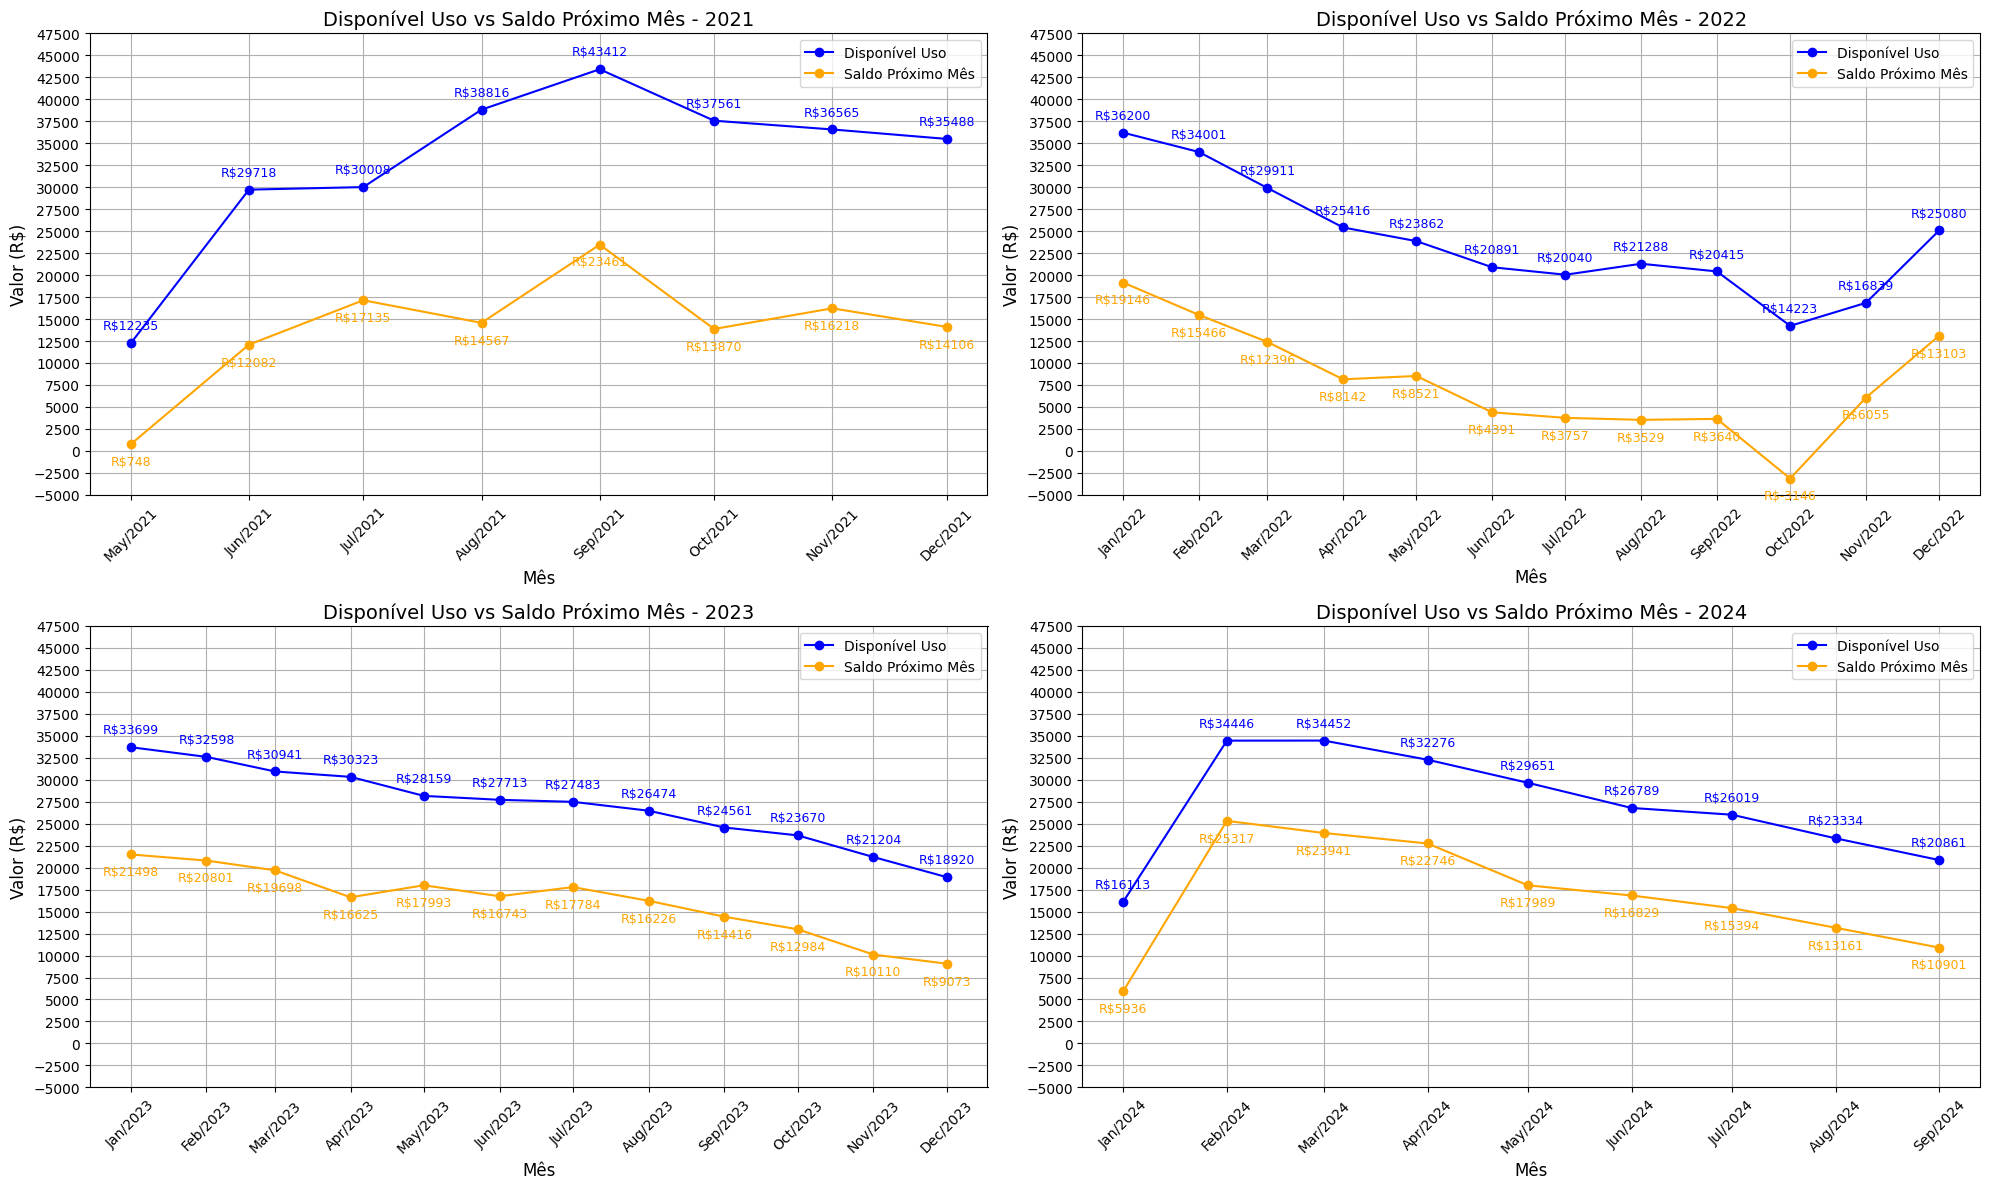

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Função para criar cada gráfico de disponivel uso vs saldo prox mês para um ano específico
def plot_graph(ax, df, title):
    # Plotar disponível uso
    ax.plot(df['Meses'], df['disponivel uso'], label='Disponível Uso', marker='o', color="blue")
    ax.plot(df['Meses'], df['saldo prox mês'], label='Saldo Próximo Mês', marker='o', color="orange")

    # Adicionar rótulos, ajustando a posição com base nos valores
    for i in range(len(df)):
        disponivel = df['disponivel uso'].iloc[i]
        saldo = df['saldo prox mês'].iloc[i]

        if disponivel > saldo:
            # Disponível maior que saldo: rótulo de disponível acima e saldo abaixo
            ax.annotate(f'R${int(disponivel)}', (df['Meses'].iloc[i], disponivel),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')
            ax.annotate(f'R${int(saldo)}', (df['Meses'].iloc[i], saldo),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='orange')
        else:
            # Saldo maior que disponível: rótulo de saldo acima e disponível abaixo
            ax.annotate(f'R${int(saldo)}', (df['Meses'].iloc[i], saldo),
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='orange')
            ax.annotate(f'R${int(disponivel)}', (df['Meses'].iloc[i], disponivel),
                        textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='blue')

    # Configurações do gráfico
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Valor (R$)', fontsize=12)

    # Formatação das datas no eixo X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # Rotacionar os rótulos do eixo X
    ax.tick_params(axis='x', rotation=45)

    # Definir limite no eixo Y e marcações de 2500 em 2500
    ax.set_ylim(-5000, 47500)
    ax.yaxis.set_major_locator(plt.MultipleLocator(2500))

    # Adicionar legenda e grade
    ax.legend(fontsize=10)
    ax.grid(True)

# Criar a figura e os subplots (2 linhas, 2 colunas para 4 gráficos)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))  # Ajustar tamanho da imagem para boa visualização

# Plotar gráficos para cada ano
plot_graph(axes[0, 0], df_2021, 'Disponível Uso vs Saldo Próximo Mês - 2021')
plot_graph(axes[0, 1], df_2022, 'Disponível Uso vs Saldo Próximo Mês - 2022')
plot_graph(axes[1, 0], df_2023, 'Disponível Uso vs Saldo Próximo Mês - 2023')
plot_graph(axes[1, 1], df_2024, 'Disponível Uso vs Saldo Próximo Mês - 2024')

# Ajustar o layout para garantir que tudo seja exibido adequadamente
plt.tight_layout()

# Mostrar a figura com os 4 gráficos
plt.show()


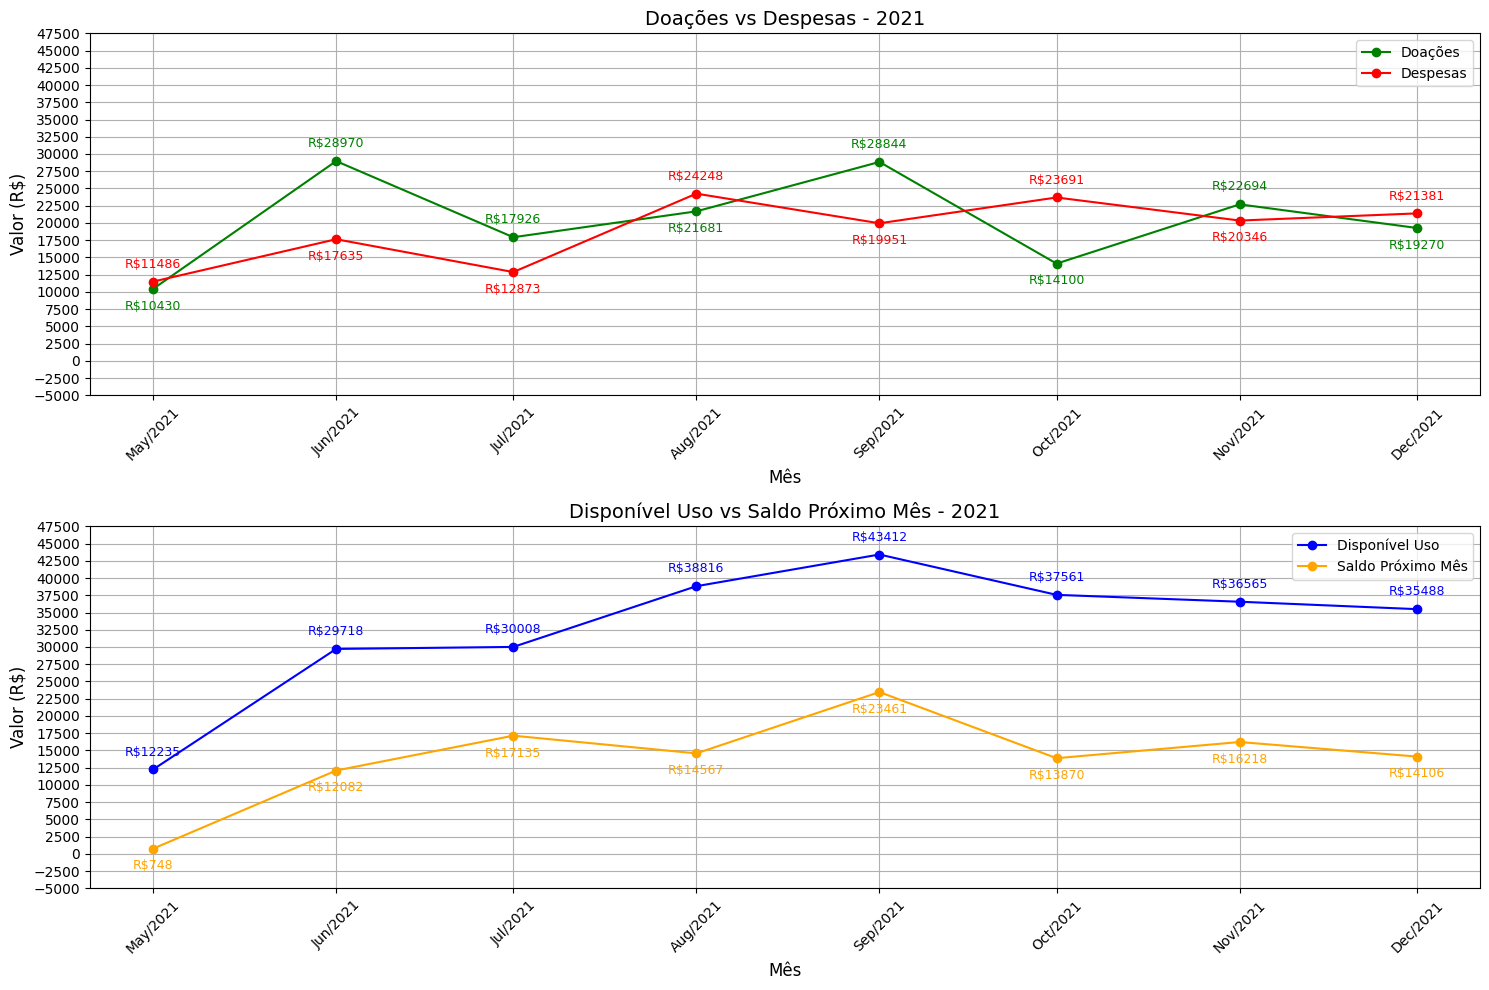

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Função para criar gráfico de doações vs despesas
def plot_doacoes_despesas(ax, df, title):
    ax.plot(df['Meses'], df['doações'], label='Doações', marker='o', color="green")
    ax.plot(df['Meses'], df['despesas'], label='Despesas', marker='o', color="red")

    # Posicionar rótulos
    for i in range(len(df)):
        doacao = df['doações'].iloc[i]
        despesa = df['despesas'].iloc[i]
        if doacao > despesa:
            ax.annotate(f'R${int(doacao)}', (df['Meses'].iloc[i], doacao), xytext=(0,10), textcoords='offset points', ha='center', fontsize=9, color='green')
            ax.annotate(f'R${int(despesa)}', (df['Meses'].iloc[i], despesa), xytext=(0,-15), textcoords='offset points', ha='center', fontsize=9, color='red')
        else:
            ax.annotate(f'R${int(despesa)}', (df['Meses'].iloc[i], despesa), xytext=(0,10), textcoords='offset points', ha='center', fontsize=9, color='red')
            ax.annotate(f'R${int(doacao)}', (df['Meses'].iloc[i], doacao), xytext=(0,-15), textcoords='offset points', ha='center', fontsize=9, color='green')

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Valor (R$)', fontsize=12)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(-5000, 47500)
    ax.yaxis.set_major_locator(plt.MultipleLocator(2500))
    ax.legend(fontsize=10)
    ax.grid(True)

# Função para criar gráfico de disponível uso vs saldo prox mês
def plot_disponivel_saldo(ax, df, title):
    ax.plot(df['Meses'], df['disponivel uso'], label='Disponível Uso', marker='o', color="blue")
    ax.plot(df['Meses'], df['saldo prox mês'], label='Saldo Próximo Mês', marker='o', color="orange")

    # Posicionar rótulos
    for i in range(len(df)):
        disponivel = df['disponivel uso'].iloc[i]
        saldo = df['saldo prox mês'].iloc[i]
        if disponivel > saldo:
            ax.annotate(f'R${int(disponivel)}', (df['Meses'].iloc[i], disponivel), xytext=(0,10), textcoords='offset points', ha='center', fontsize=9, color='blue')
            ax.annotate(f'R${int(saldo)}', (df['Meses'].iloc[i], saldo), xytext=(0,-15), textcoords='offset points', ha='center', fontsize=9, color='orange')
        else:
            ax.annotate(f'R${int(saldo)}', (df['Meses'].iloc[i], saldo), xytext=(0,10), textcoords='offset points', ha='center', fontsize=9, color='orange')
            ax.annotate(f'R${int(disponivel)}', (df['Meses'].iloc[i], disponivel), xytext=(0,-15), textcoords='offset points', ha='center', fontsize=9, color='blue')

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Valor (R$)', fontsize=12)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(-5000, 47500)
    ax.yaxis.set_major_locator(plt.MultipleLocator(2500))
    ax.legend(fontsize=10)
    ax.grid(True)

# Criar a figura e os dois subplots (1 para doações vs despesas e outro para disponível uso vs saldo prox mês)
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Dados do ano de 2021 (df_2021)
plot_doacoes_despesas(axes[0], df_2021, 'Doações vs Despesas - 2021')
plot_disponivel_saldo(axes[1], df_2021, 'Disponível Uso vs Saldo Próximo Mês - 2021')

# Ajustar o layout
plt.tight_layout()

# Mostrar a figura
plt.show()


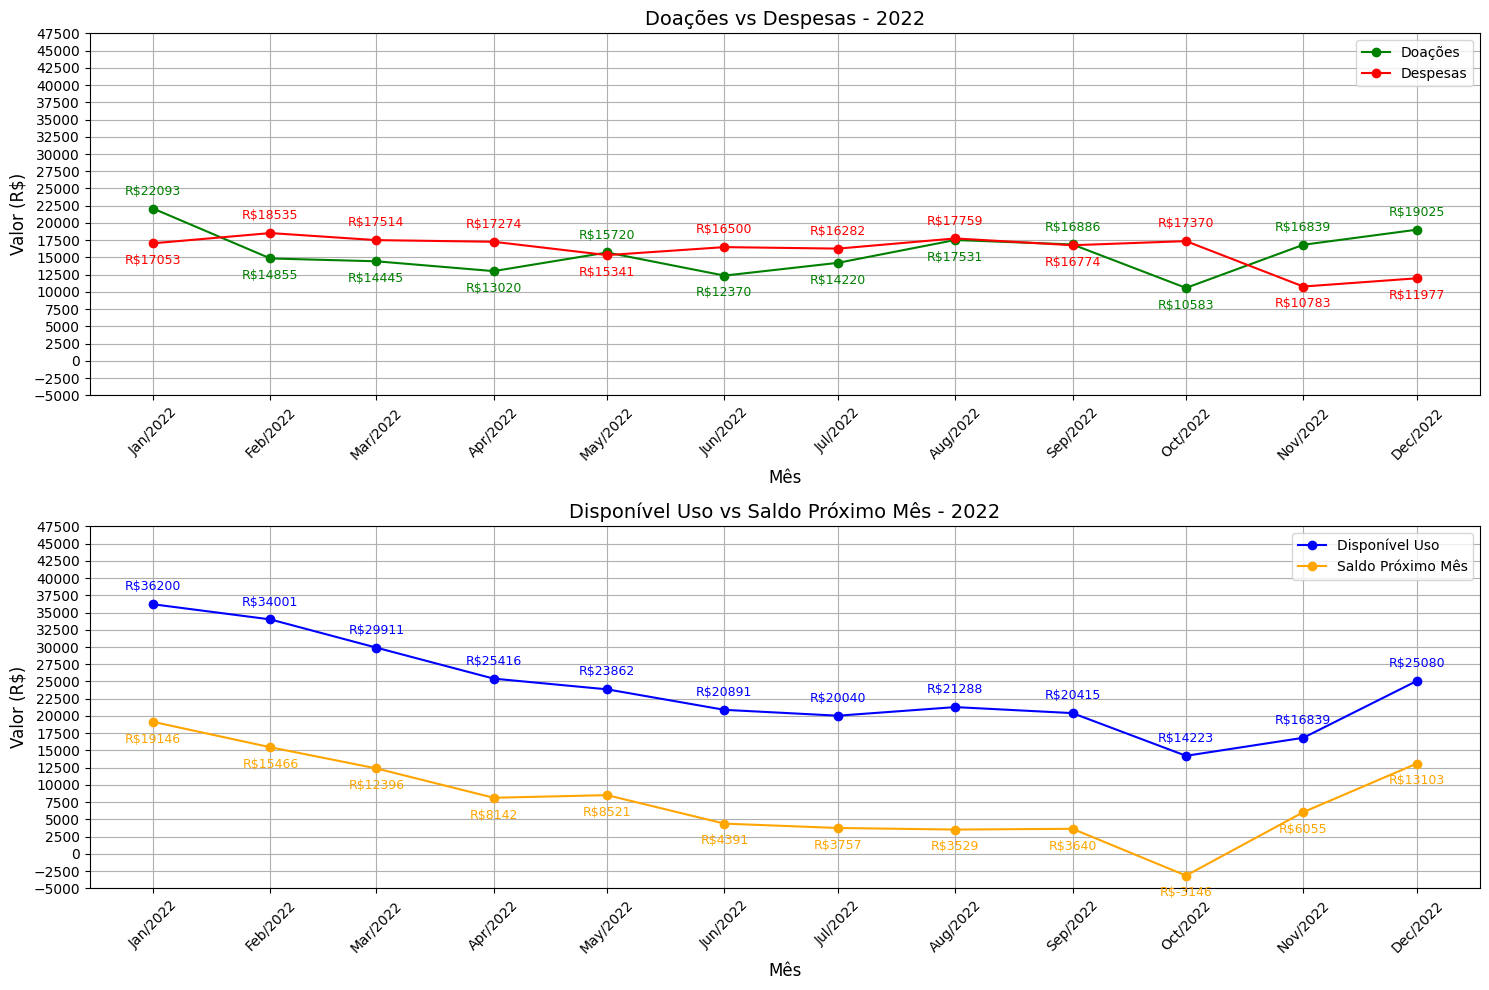

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Funções plot_doacoes_despesas e plot_disponivel_saldo como no exemplo acima

# Criar a figura e os dois subplots (1 para doações vs despesas e outro para disponível uso vs saldo prox mês)
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Dados do ano de 2022 (df_2022)
plot_doacoes_despesas(axes[0], df_2022, 'Doações vs Despesas - 2022')
plot_disponivel_saldo(axes[1], df_2022, 'Disponível Uso vs Saldo Próximo Mês - 2022')

# Ajustar o layout
plt.tight_layout()

# Mostrar a figura
plt.show()


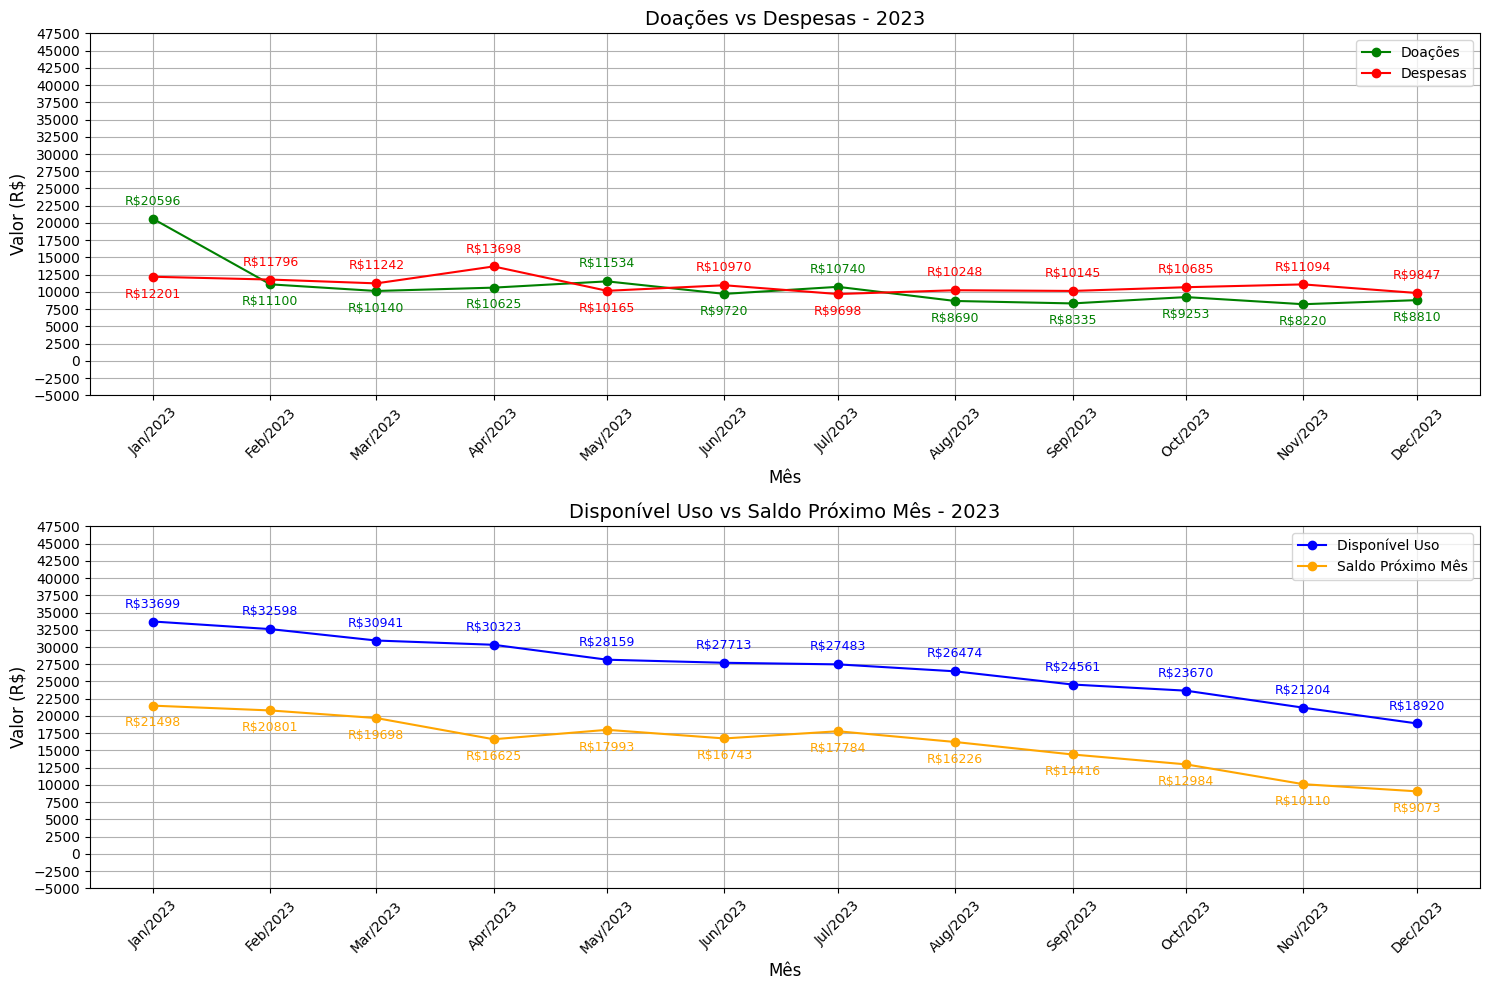

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Funções plot_doacoes_despesas e plot_disponivel_saldo como no exemplo acima

# Criar a figura e os dois subplots (1 para doações vs despesas e outro para disponível uso vs saldo prox mês)
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Dados do ano de 2023 (df_2023)
plot_doacoes_despesas(axes[0], df_2023, 'Doações vs Despesas - 2023')
plot_disponivel_saldo(axes[1], df_2023, 'Disponível Uso vs Saldo Próximo Mês - 2023')

# Ajustar o layout
plt.tight_layout()

# Mostrar a figura
plt.show()


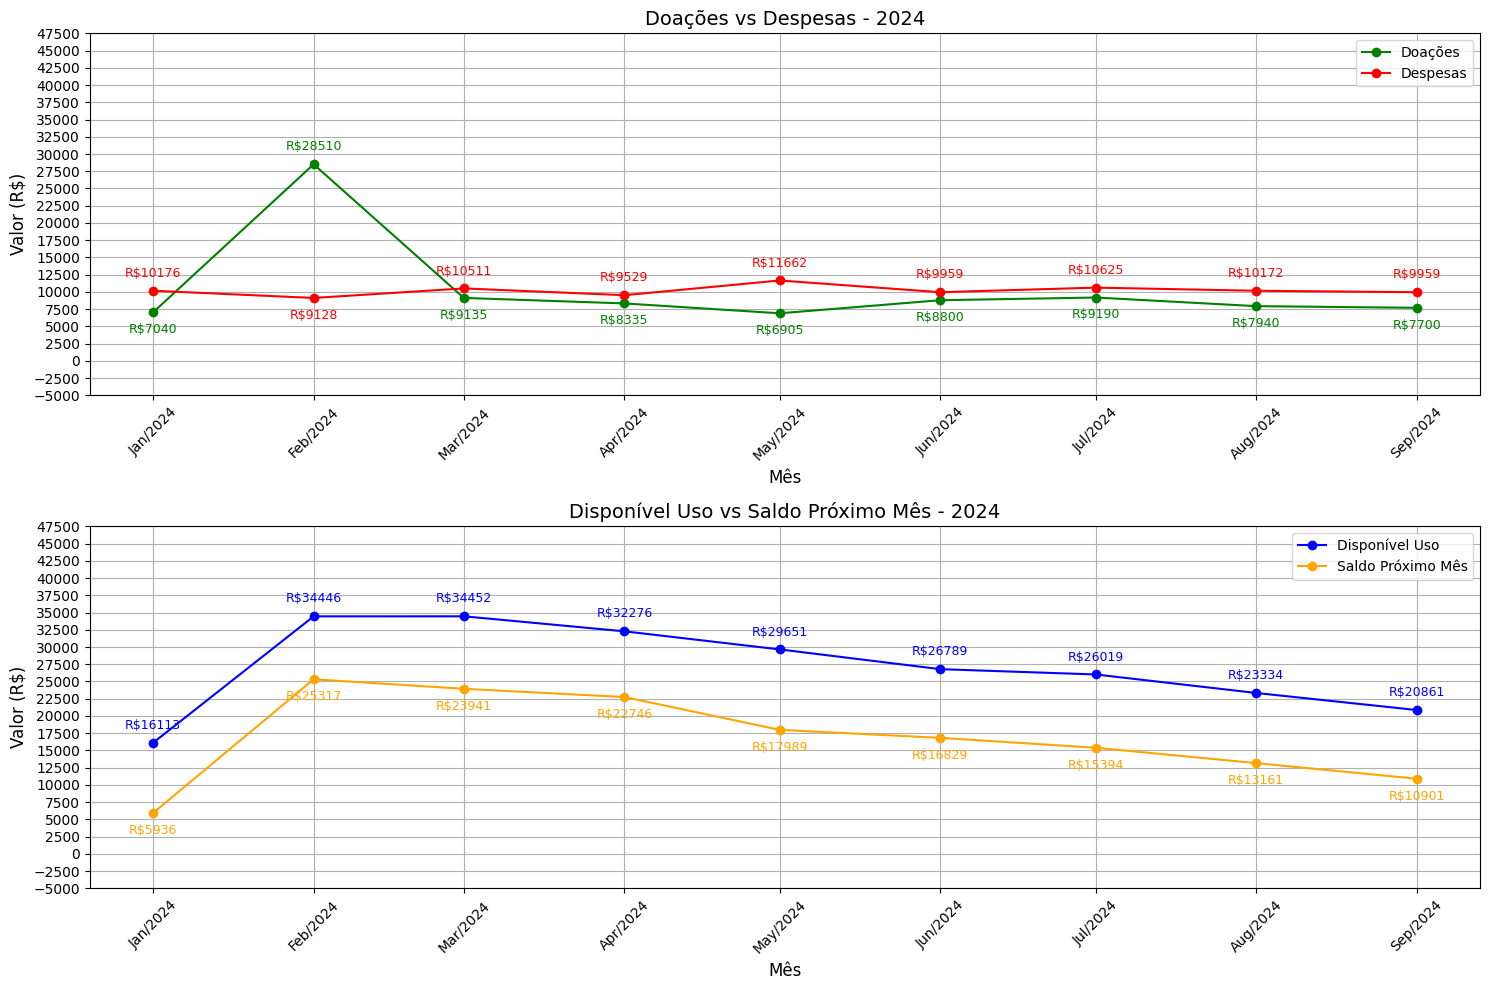

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Funções plot_doacoes_despesas e plot_disponivel_saldo como no exemplo acima

# Criar a figura e os dois subplots (1 para doações vs despesas e outro para disponível uso vs saldo prox mês)
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Dados do ano de 2024 (df_2024)
plot_doacoes_despesas(axes[0], df_2024, 'Doações vs Despesas - 2024')
plot_disponivel_saldo(axes[1], df_2024, 'Disponível Uso vs Saldo Próximo Mês - 2024')

# Ajustar o layout
plt.tight_layout()

# Mostrar a figura
plt.show()


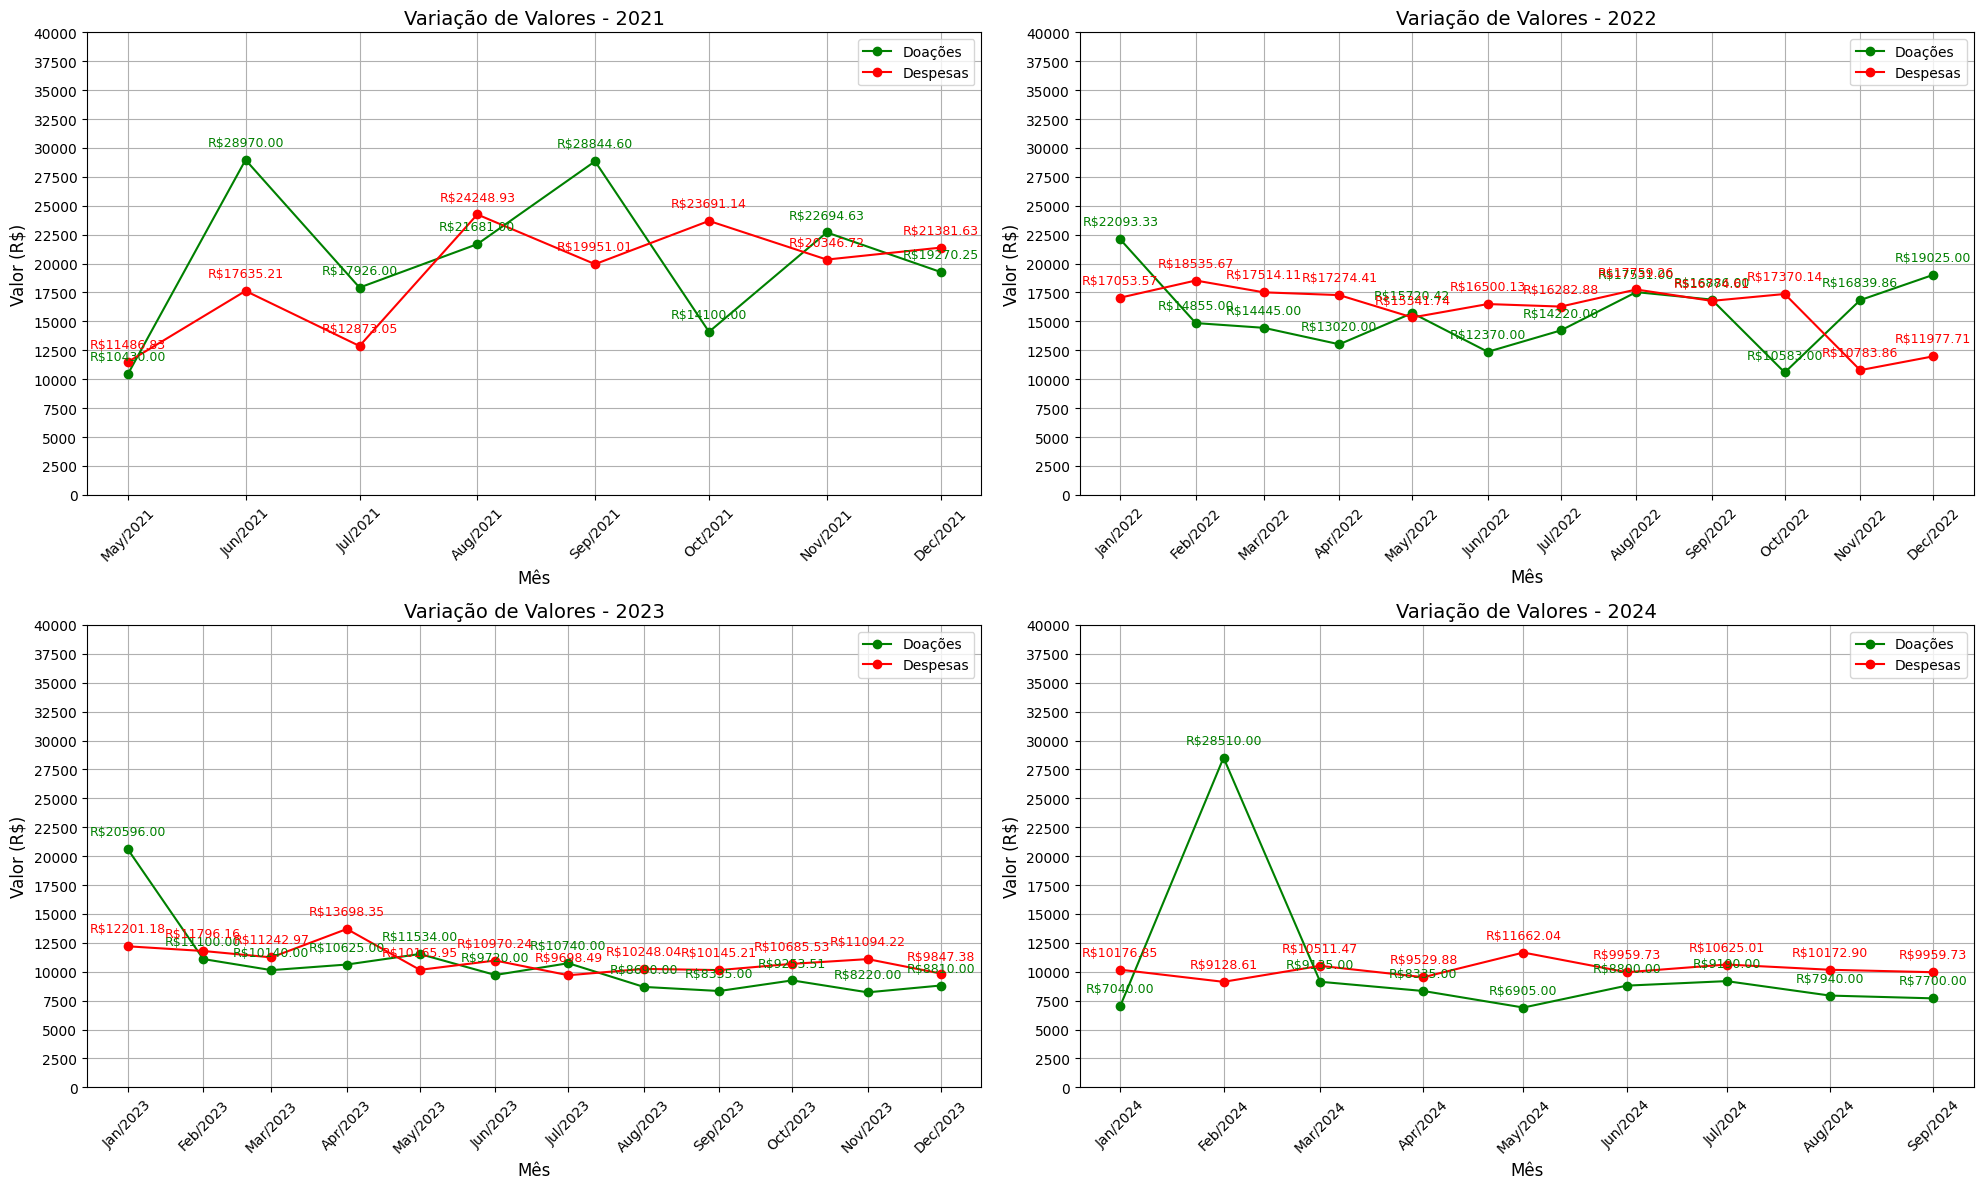

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# Criar a figura e os subplots (2 linhas, 2 colunas para 4 gráficos)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))  # Tamanho ajustado para acomodar 4 gráficos

# Função para criar cada gráfico com rótulos nos markers
def plot_graph(ax, df, title):
    # Plotar doações
    ax.plot(df['Meses'], df['doações'], label='Doações', marker='o', color="green")
    # Adicionar rótulos para os markers de doações com o símbolo de reais
    for i, txt in enumerate(df['doações']):
        ax.annotate(f'R${txt:.2f}', (df['Meses'].iloc[i], df['doações'].iloc[i]),
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='green')

    # Plotar despesas
    ax.plot(df['Meses'], df['despesas'], label='Despesas', marker='o', color="red")
    # Adicionar rótulos para os markers de despesas com o símbolo de reais
    for i, txt in enumerate(df['despesas']):
        ax.annotate(f'R${txt:.2f}', (df['Meses'].iloc[i], df['despesas'].iloc[i]),
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')

    # Configurações do gráfico
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Valor (R$)', fontsize=12)

    # Formatação das datas no eixo X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # Rotacionar os rótulos do eixo X
    ax.tick_params(axis='x', rotation=45)

    # Definir limite no eixo Y (máximo 30.000) e marcações de 2000 em 2000
    ax.set_ylim(0, 40000)
    ax.yaxis.set_major_locator(plt.MultipleLocator(2500))

    # Adicionar legenda e grade
    ax.legend(fontsize=10)
    ax.grid(True)

# Plotar para cada ano
plot_graph(axes[0, 0], df_2021, 'Variação de Valores - 2021')
plot_graph(axes[0, 1], df_2022, 'Variação de Valores - 2022')
plot_graph(axes[1, 0], df_2023, 'Variação de Valores - 2023')
plot_graph(axes[1, 1], df_2024, 'Variação de Valores - 2024')

# Ajustar o layout para garantir que tudo seja exibido adequadamente
plt.tight_layout()

# Mostrar a figura com os 4 gráficos
plt.show()


In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Função para formatar valores no padrão brasileiro
def formatar_valor(valor):
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Função para calcular medidas estatísticas por ano
def calcular_estatisticas(df, coluna):
    estatisticas = df.groupby(df['Meses'].dt.year)[coluna].agg(['mean', 'median', lambda x: x.mode()[0], 'std'])
    estatisticas.columns = ['Média', 'Mediana', 'Moda', 'Desvio Padrão']
    estatisticas['Coeficiente de Variação'] = estatisticas['Desvio Padrão'] / estatisticas['Média']
    return estatisticas

# Calcular estatísticas para doações e despesas
estatisticas_doacoes = calcular_estatisticas(df_transposto, 'doações')
estatisticas_despesas = calcular_estatisticas(df_transposto, 'despesas')

# Função para criar gráfico de comparação por ano com markers de valores
def criar_grafico_comparacao(estatisticas, metrica, titulo, cor, is_monetario=True):
    plt.figure(figsize=(10, 6))
    plt.plot(estatisticas.index, estatisticas[metrica], marker='o', color=cor, label=titulo)

    # Adicionar os valores como markers
    for i, valor in enumerate(estatisticas[metrica]):
        if is_monetario:
            valor_formatado = formatar_valor(valor)  # Formata o número no padrão brasileiro
        else:
            valor_formatado = f'{valor:.2%}'  # Para coeficiente de variação
        plt.annotate(valor_formatado, (estatisticas.index[i], valor),
                     textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color=cor)

    plt.title(f'Comparação da {titulo} - Ano a Ano', fontsize=14)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel(f'{titulo}', fontsize=12)
    plt.xticks(estatisticas.index, rotation=45)
    plt.grid(True)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

'''
# Criar gráficos para média, mediana e moda (valores monetários)

criar_grafico_comparacao(estatisticas_doacoes, 'Média', 'Média das Doações', 'green')

criar_grafico_comparacao(estatisticas_despesas, 'Média', 'Média das Despesas', 'red')

criar_grafico_comparacao(estatisticas_doacoes, 'Mediana', 'mediana do total das Doações', 'blue')

criar_grafico_comparacao(estatisticas_despesas, 'Mediana', 'Mediana das Despesas', 'orange')

criar_grafico_comparacao(estatisticas_doacoes, 'Moda', 'Moda das Doações', 'purple')
criar_grafico_comparacao(estatisticas_despesas, 'Moda', 'Moda das Despesas', 'brown')

# Criar gráfico para coeficiente de variação (adimensional)
criar_grafico_comparacao(estatisticas_doacoes, 'Coeficiente de Variação', 'Coeficiente de Variação das Doações', 'cyan', is_monetario=False)
criar_grafico_comparacao(estatisticas_despesas, 'Coeficiente de Variação', 'Coeficiente de Variação das Despesas', 'magenta', is_monetario=False)
'''


"\n# Criar gráficos para média, mediana e moda (valores monetários)\ncriar_grafico_comparacao(estatisticas_doacoes, 'Média', 'Média das Doações', 'green')\ncriar_grafico_comparacao(estatisticas_despesas, 'Média', 'Média das Despesas', 'red')\n\ncriar_grafico_comparacao(estatisticas_doacoes, 'Mediana', 'Mediana das Doações', 'blue')\ncriar_grafico_comparacao(estatisticas_despesas, 'Mediana', 'Mediana das Despesas', 'orange')\n\ncriar_grafico_comparacao(estatisticas_doacoes, 'Moda', 'Moda das Doações', 'purple')\ncriar_grafico_comparacao(estatisticas_despesas, 'Moda', 'Moda das Despesas', 'brown')\n\n# Criar gráfico para coeficiente de variação (adimensional)\ncriar_grafico_comparacao(estatisticas_doacoes, 'Coeficiente de Variação', 'Coeficiente de Variação das Doações', 'cyan', is_monetario=False)\ncriar_grafico_comparacao(estatisticas_despesas, 'Coeficiente de Variação', 'Coeficiente de Variação das Despesas', 'magenta', is_monetario=False)\n"

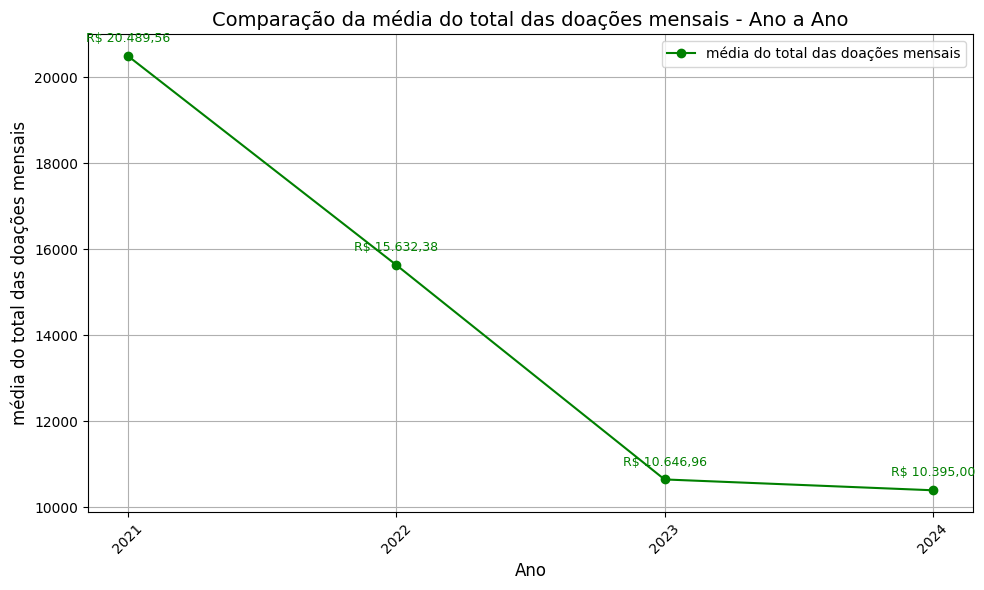

In [75]:
criar_grafico_comparacao(estatisticas_doacoes, 'Média', 'média do total das doações mensais', 'green')

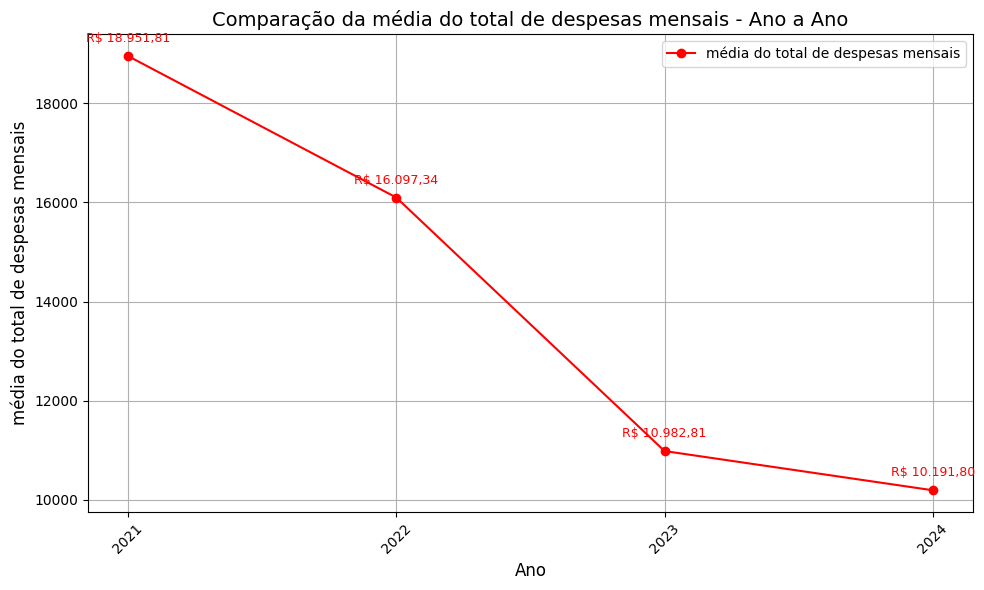

In [76]:
criar_grafico_comparacao(estatisticas_despesas, 'Média', 'média do total de despesas mensais', 'red')

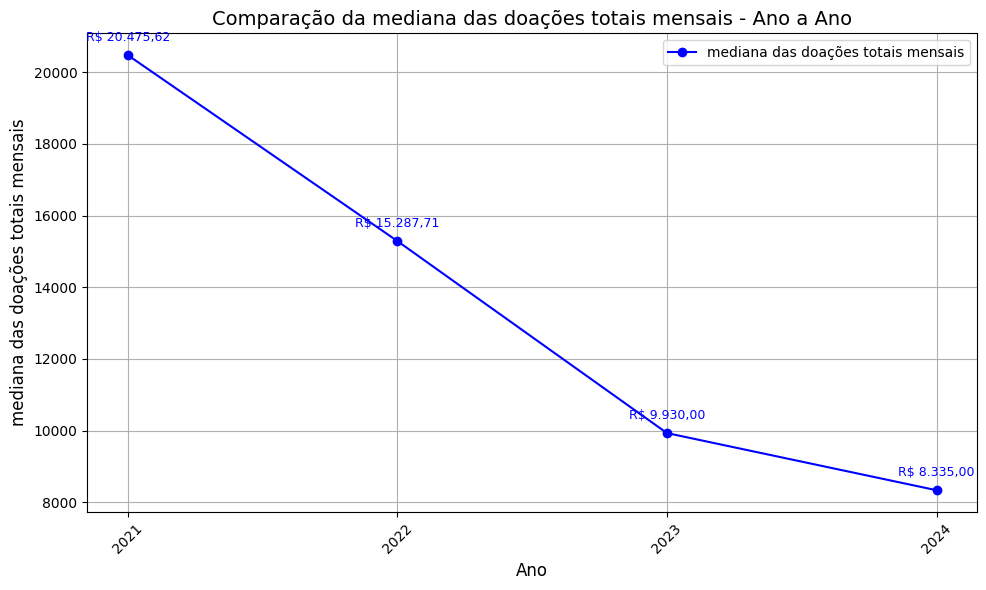

In [80]:

criar_grafico_comparacao(estatisticas_doacoes, 'Mediana', 'mediana das doações totais mensais', 'blue')